In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import mannwhitneyu ,chi2_contingency, anderson, f_oneway
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

(CVXPY) Apr 16 12:02:36 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 16 12:02:36 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [3]:
data["SK_ID_CURR"].value_counts().max()

1

In [4]:
data["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276940
Revolving loans     29167
Name: count, dtype: int64

In [5]:
data=data[data["NAME_CONTRACT_TYPE"]=="Revolving loans"]
data.drop(columns=["NAME_CONTRACT_TYPE"], inplace = True)

In [6]:
pd.DataFrame(data.isna().mean())

0
SK_ID_CURR                    0.000000
TARGET                        0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.000000
AMT_GOODS_PRICE               0.009497
NAME_TYPE_SUITE               0.009737
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OWN_CAR_AGE                   0.653718
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_WORK_PHONE               0.000000
FLAG_CONT_MOBILE              0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
OCCUPATION_TYPE               0.259540
CNT_FAM_MEMBERS               0.000069
REGION_RATING_CLIENT          0.000000
REGION_RATING_CLIENT_W_CITY   0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
REG_REGION_NOT_LIVE_REGION    0.000000
REG_REGION_NOT_WORK_REGION    0.000000
LIVE_REGION_NOT_WORK_REGION   0.000000
REG_CITY_NOT_LIVE_CITY        0.000000
REG_CITY_NOT_WORK_CITY        0.000000
LIVE_CITY_NOT_WORK_CITY       0.000000
ORGANIZATION_TYPE             0.000000
EXT_SOURCE_1                  0.524600
EXT_SOURCE_2                  0.002091
EXT_SOURCE_3                  0.214935
APARTMENTS_AVG                0.465835
BASEMENTAREA_AVG              0.545651
YEARS_BEGINEXPLUATATION_AVG   0.445915
YEARS_BUILD_AVG               0.631364
COMMONAREA_AVG                0.670141
ELEVATORS_AVG                 0.491377
ENTRANCES_AVG                 0.460760
FLOORSMAX_AVG                 0.455515
FLOORSMIN_AVG                 0.646073
LANDAREA_AVG                  0.554942
LIVINGAPARTMENTS_AVG          0.653204
LIVINGAREA_AVG                0.461755
NONLIVINGAPARTMENTS_AVG       0.664312
NONLIVINGAREA_AVG             0.511228
APARTMENTS_MODE               0.465835
BASEMENTAREA_MODE             0.545651
YEARS_BEGINEXPLUATATION_MODE  0.445915
YEARS_BUILD_MODE              0.631364
COMMONAREA_MODE               0.670141
ELEVATORS_MODE                0.491377
ENTRANCES_MODE                0.460760
FLOORSMAX_MODE                0.455515
FLOORSMIN_MODE                0.646073
LANDAREA_MODE                 0.554942
LIVINGAPARTMENTS_MODE         0.653204
LIVINGAREA_MODE               0.461755
NONLIVINGAPARTMENTS_MODE      0.664312
NONLIVINGAREA_MODE            0.511228
APARTMENTS_MEDI               0.465835
BASEMENTAREA_MEDI             0.545651
YEARS_BEGINEXPLUATATION_MEDI  0.445915
YEARS_BUILD_MEDI              0.631364
COMMONAREA_MEDI               0.670141
ELEVATORS_MEDI                0.491377
ENTRANCES_MEDI                0.460760
FLOORSMAX_MEDI                0.455515
FLOORSMIN_MEDI                0.646073
LANDAREA_MEDI                 0.554942
LIVINGAPARTMENTS_MEDI         0.653204
LIVINGAREA_MEDI               0.461755
NONLIVINGAPARTMENTS_MEDI      0.664312
NONLIVINGAREA_MEDI            0.511228
FONDKAPREMONT_MODE            0.651524
HOUSETYPE_MODE                0.459458
TOTALAREA_MODE                0.440704
WALLSMATERIAL_MODE            0.467378
EMERGENCYSTATE_MODE           0.431412
OBS_30_CNT_SOCIAL_CIRCLE      0.034902
DEF_30_CNT_SOCIAL_CIRCLE      0.034902
OBS_60_CNT_SOCIAL_CIRCLE      0.034902
DEF_60_CNT_SOCIAL_CIRCLE      0.034902
DAYS_LAST_PHONE_CHANGE        0.000000
FLAG_DOCUMENT_2               0.000000
FLAG_DOCUMENT_3               0.000000
FLAG_DOCUMENT_4               0.000000
FLAG_DOCUMENT_5               0.000000
FLAG_DOCUMENT_6               0.000000
FLAG_DOCUMENT_7               0.000000
FLAG_DOCUMENT_8               0.000000
FLAG_DOCUMENT_9     

In [7]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.948641
1    0.051359
Name: proportion, dtype: float64

#### Variables CREDIT BUREAU

In [8]:
credit_bureau_data=pd.read_csv("../data/cb_findings.csv", index_col=0)
data=data.merge(credit_bureau_data, left_on="SK_ID_CURR", right_on="CB_SK_ID_CURR")

In [9]:
credit_bureau_data.isna().mean()

CB_SK_ID_CURR             0.0
CB_AMT_CREDIT_SUM_DEBT    0.0
CB_NB_CREDIT_ACTIVE       0.0
CB_NB_CREDIT_CLOSED       0.0
CB_DAYS_CREDIT            0.0
CB_DAYS_CREDIT_ENDDATE    0.0
CB_AMT_CREDIT_SUM         0.0
CB_AMT_ANNUITY            0.0
dtype: float64

#### Etudes des variables -- prédicteurs potentiels

In [10]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE                            float64
FLAG_MOBIL   

In [11]:
data["HAS_CHILDREN"]=data["CNT_CHILDREN"].apply(lambda x : "Y" if x > 0 else "N")
data.drop(columns=["CNT_CHILDREN"], inplace=True)

In [12]:
data.nunique()

SK_ID_CURR                      29167
TARGET                              2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
AMT_INCOME_TOTAL                  520
AMT_CREDIT                         35
AMT_ANNUITY                        45
AMT_GOODS_PRICE                    39
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         80
DAYS_BIRTH                      13206
DAYS_EMPLOYED                    6455
DAYS_REGISTRATION               10772
DAYS_ID_PUBLISH                  5520
OWN_CAR_AGE                        49
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
OCCUPATION_T

In [13]:
drop_documents_cols=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4" , 
"FLAG_DOCUMENT_5" , "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7" ,              
"FLAG_DOCUMENT_8" , "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10"  ,"FLAG_DOCUMENT_11" , "FLAG_DOCUMENT_12",              
"FLAG_DOCUMENT_13" ,"FLAG_DOCUMENT_14" ,"FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16" ,
"FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

In [14]:
data.drop(columns=drop_documents_cols, inplace=True)

In [15]:
def convert_numeric_to_category(df: pd.DataFrame):
    for colname in df.columns.tolist():
        if (df[colname].dtype=="number") & (df[colname].nunique() <=10):
            df[colname]=df[colname].astype("category")
            pass
        else:
            pass

In [16]:
convert_numeric_to_category(data)

In [17]:
data["date_annee"]=data["date_mensuelle"].dt.year

In [18]:
out_of_sample_data=data[data["date_annee"]==2020]
data=data[data["date_annee"]<2020]

In [19]:
out_of_sample_data["TARGET"].value_counts(normalize=True)


TARGET
0    0.949473
1    0.050527
Name: proportion, dtype: float64

In [20]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.94852
1    0.05148
Name: proportion, dtype: float64

In [21]:
categorical_vars=data.select_dtypes(include="object").columns.tolist()
numerical_vars=data.select_dtypes(include="number").columns.tolist()
binary_vars=[var for var in numerical_vars if (data[var].nunique()==2)&(var !="TARGET")]

In [22]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


def mannwhitney_test(df:pd.DataFrame,variable:str,target:str):
    # Séparer les données en deux groupes en fonction de la variable cible
    group_1 = df[df[target] == 0]
    group_2 = df[df[target] == 1]

    stat, p_value = mannwhitneyu(group_1[variable].dropna(), group_2[variable].dropna())
    # Afficher les résultats
    print(f"Variable: {variable}")
    print(f"Mann-Whitney U-statistic: {stat}")
    print(f"P-value: {p_value}")
    print(10*"===")
    
    pass


def calculate_information_value_from_contingency_table(contingency_table):
    """
    Calculer l'Information Value à partir d'une table de contingence.
    
    Args:
        contingency_table (pd.DataFrame): La table de contingence entre la variable et la target.
        
    Returns:
        float: L'Information Value calculé.
    """
    non_event_rate=contingency_table.iloc[0]/(contingency_table.iloc[0].sum())
    event_rate=contingency_table.iloc[1]/(contingency_table.iloc[1].sum())
    iv=0
    if (non_event_rate.min() > 0) & (event_rate.mean() >0) :
        for col in non_event_rate.index:
            iv += (event_rate[col] - non_event_rate[col])*np.log(event_rate[col] / non_event_rate[col])

    return iv

In [23]:

def show_volume_stability_overtime(data:pd.DataFrame,colname:str,threshold=0.05):
        # Calcul des pourcentages pour chaque modalité au fil du temps
    resultats = data[[colname, "date_annee"]].groupby(by=["date_annee"]).value_counts(normalize=True).unstack().fillna(0)

    # Affichage des lineplots
    sns.set(style="whitegrid")
    resultats.plot(kind='line', marker='o', markersize=8)
    plt.title('Pourcentage de chaque modalité au fil du temps')
    plt.hlines(y=threshold, xmin=data["date_annee"].min(), xmax=data["date_annee"].max(), linestyles="dashed")
    plt.xlabel('Temps')
    plt.ylabel('Pourcentage')
    plt.legend(title=f"{colname}")
    plt.show()
    
    
def show_risk_stability_overtime(data:pd.DataFrame,colname:str):
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()
    

#### Test de stabilité en risque des variables binaires

In [24]:
binary_vars

['FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [25]:
data["FLAG_MOBIL"].value_counts()

FLAG_MOBIL
1    25466
Name: count, dtype: int64

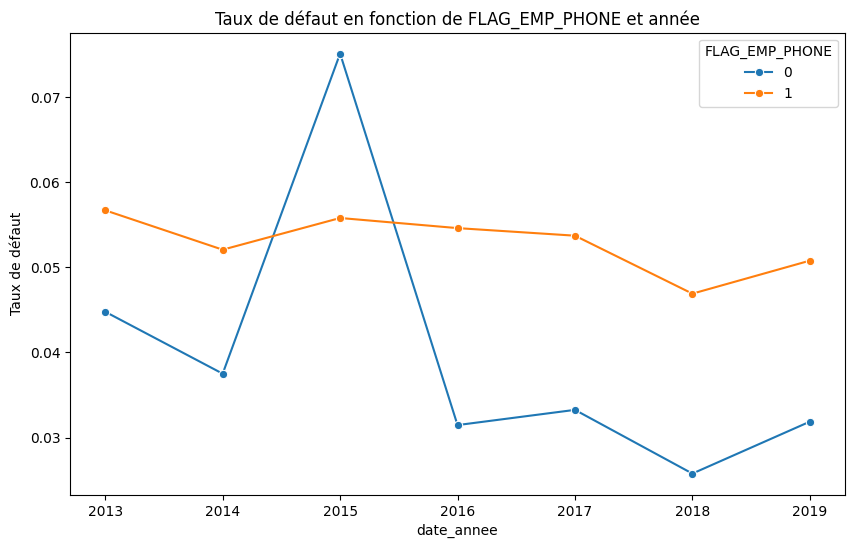

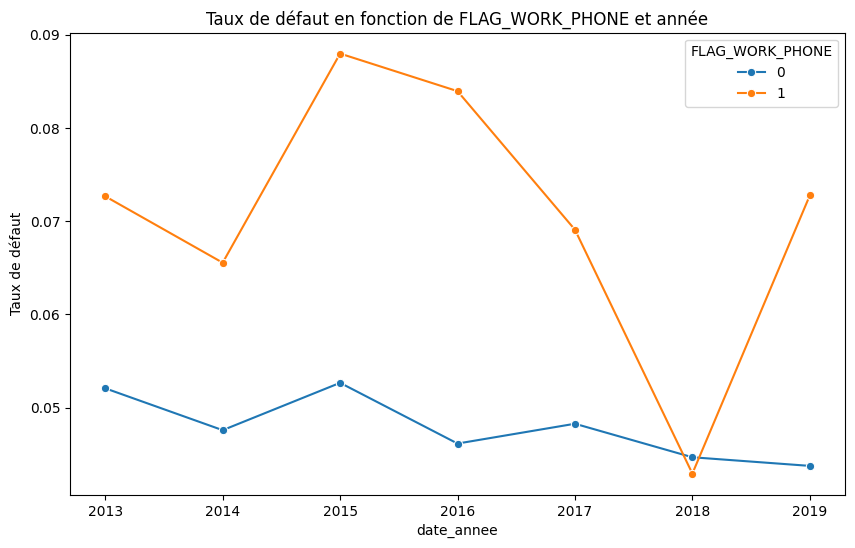

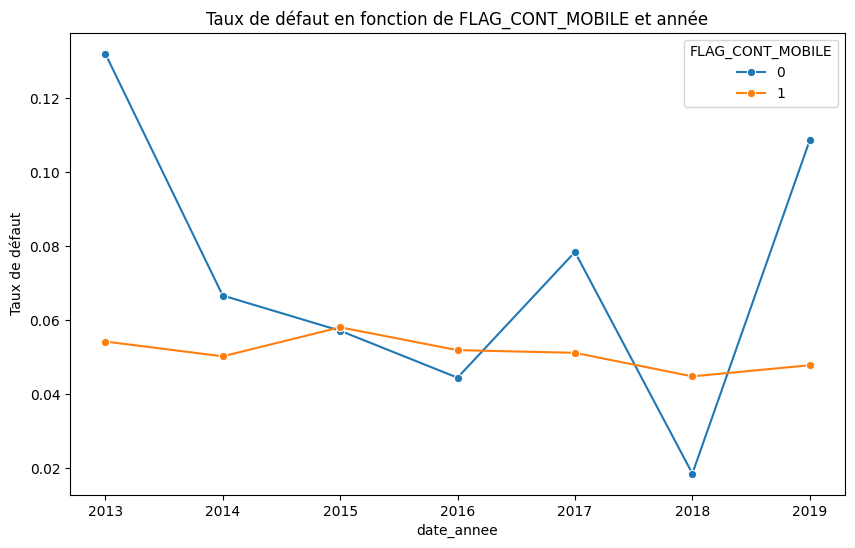

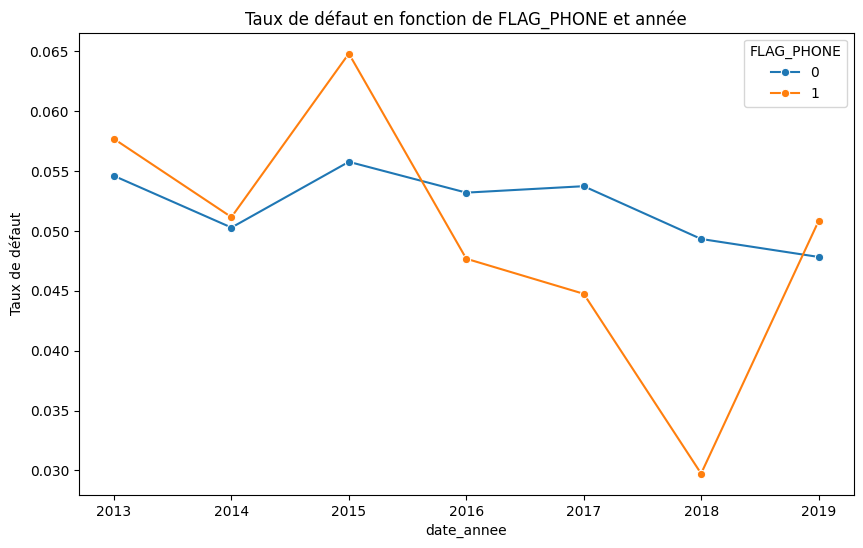

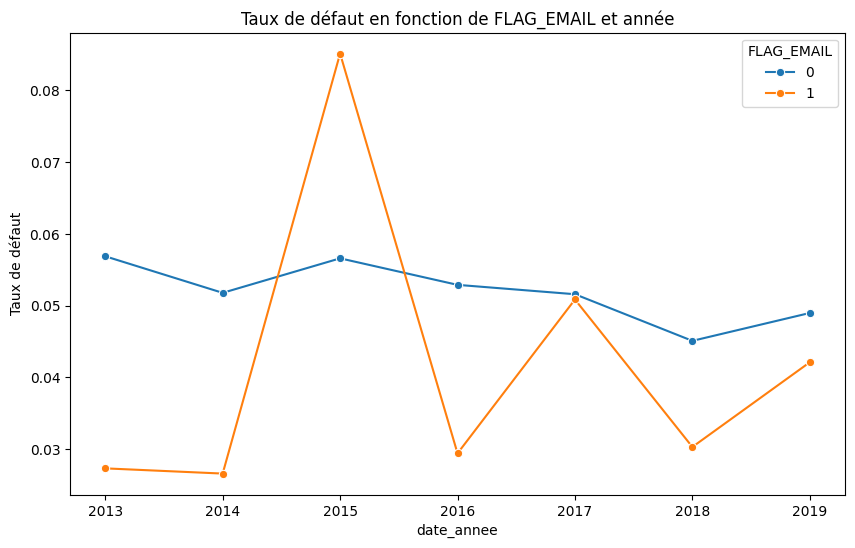

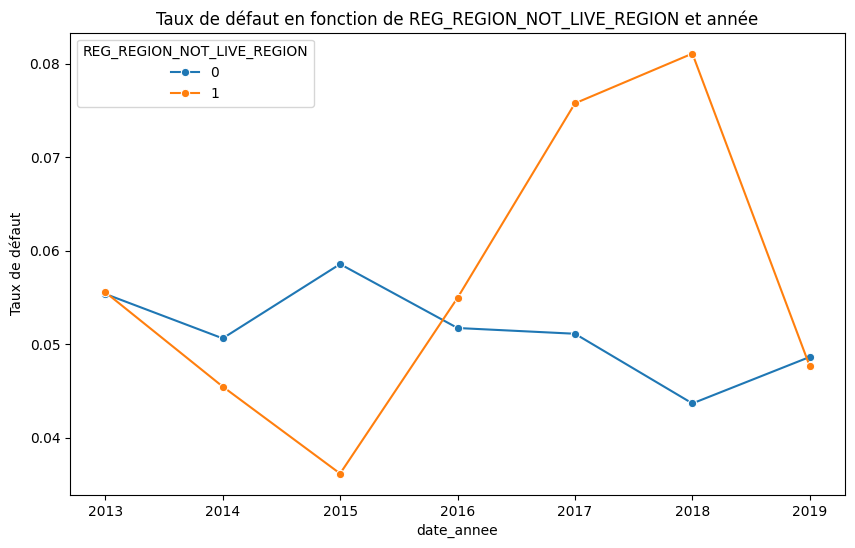

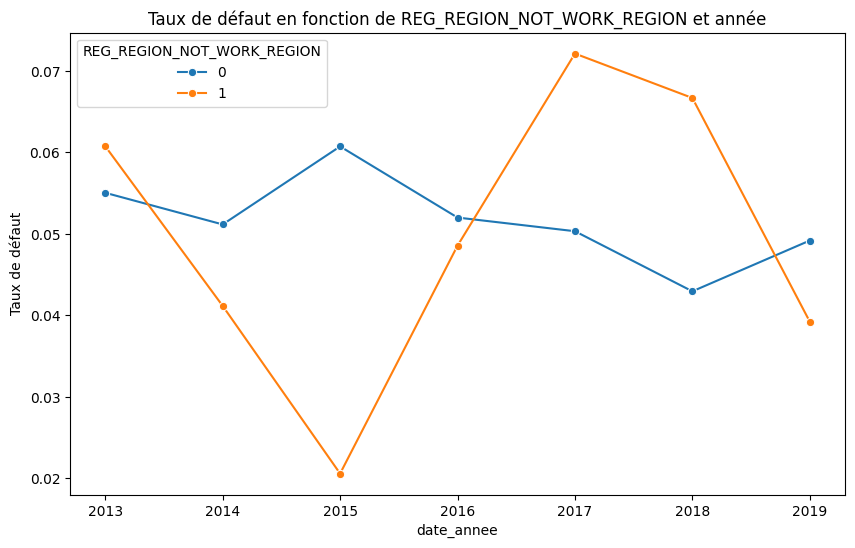

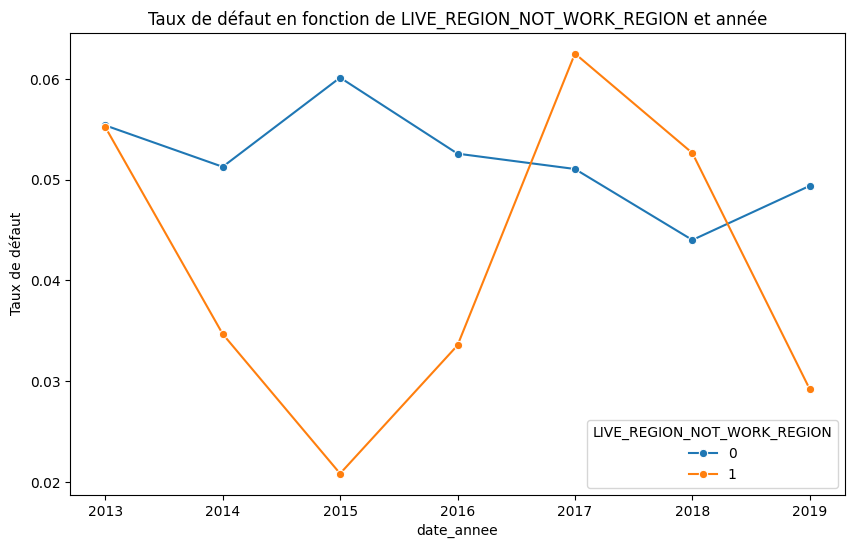

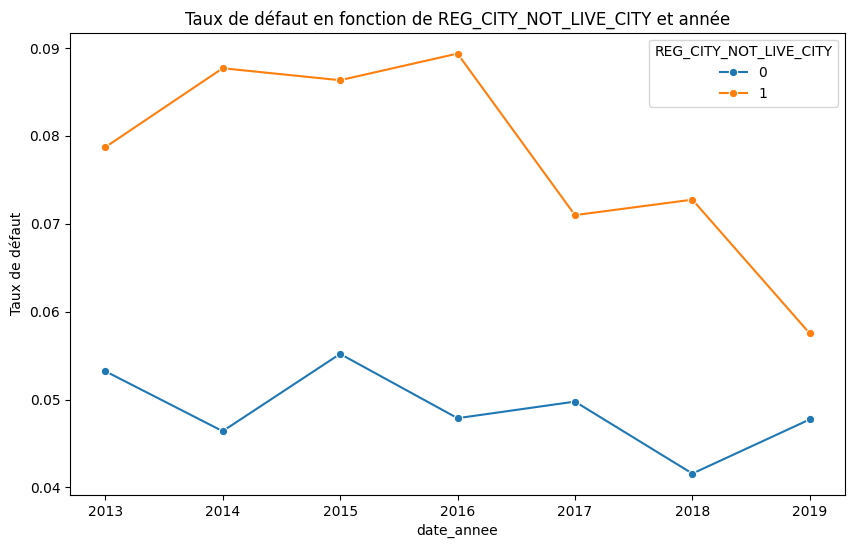

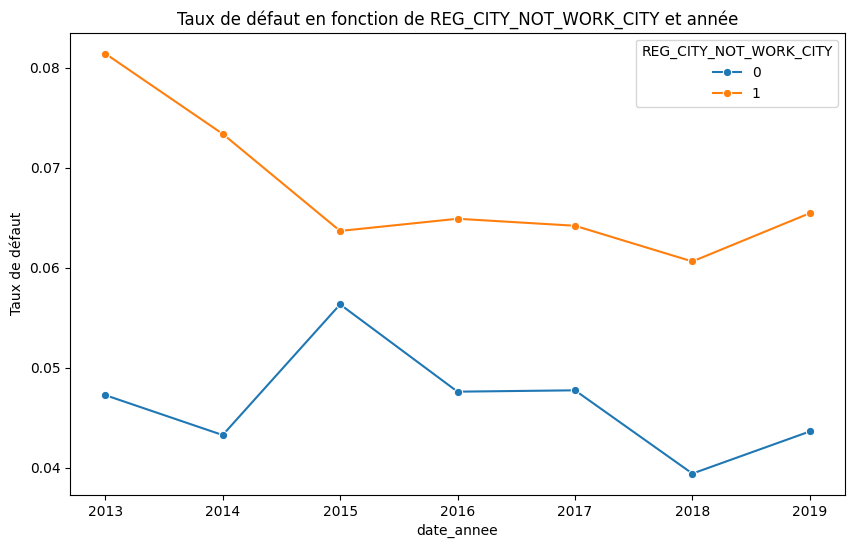

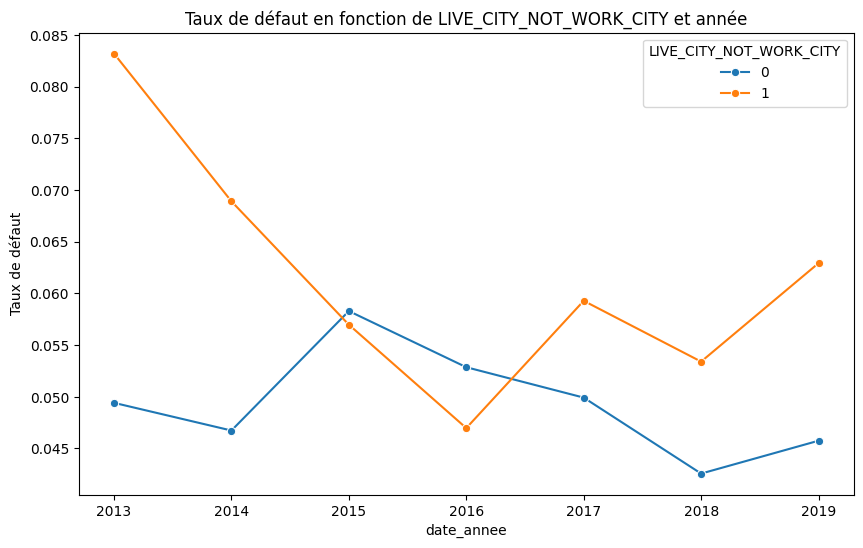

In [26]:
for var in binary_vars:
    show_risk_stability_overtime(data,var)

In [27]:
#### variables à écarter : flag_mobil, flag_cont_mobil, flag_email, reg_region_not_live_region, reg_region_not_work_region,live_region_not_work_region, 

In [28]:
binary_risk_non_stable_vars=["FLAG_MOBIL", "FLAG_CONT_MOBILE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION"]

In [29]:
binary_vars=list(filter(lambda x : x not in binary_risk_non_stable_vars, binary_vars))

In [30]:
from scipy.stats import chi2_contingency

In [31]:
for col in binary_vars:
    print(col)
    print(chi2_contingency(pd.crosstab(data["TARGET"], data[col].dropna())))
    print(60*"=")

FLAG_EMP_PHONE
Chi2ContingencyResult(statistic=8.545800273113661, pvalue=0.003463203106816143, dof=1, expected_freq=array([[ 2749.75830519, 21405.24169481],
       [  149.24169481,  1161.75830519]]))
FLAG_WORK_PHONE
Chi2ContingencyResult(statistic=35.23375497655481, pvalue=2.9241108629576044e-09, dof=1, expected_freq=array([[20354.28198382,  3800.71801618],
       [ 1104.71801618,   206.28198382]]))
FLAG_PHONE
Chi2ContingencyResult(statistic=0.5837502840783635, pvalue=0.44484607238680274, dof=1, expected_freq=array([[18071.19531925,  6083.80468075],
       [  980.80468075,   330.19531925]]))
REG_CITY_NOT_LIVE_CITY
Chi2ContingencyResult(statistic=36.08148428885455, pvalue=1.8923641679441282e-09, dof=1, expected_freq=array([[21967.7138145,  2187.2861855],
       [ 1192.2861855,   118.7138145]]))
REG_CITY_NOT_WORK_CITY
Chi2ContingencyResult(statistic=41.981385504849854, pvalue=9.21464363506673e-11, dof=1, expected_freq=array([[18436.37536323,  5718.62463677],
       [ 1000.62463677,   310

#### Test de stabilité en volume des variables binaires

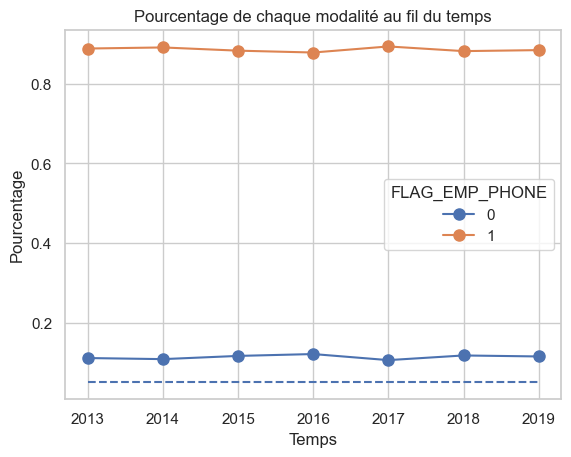

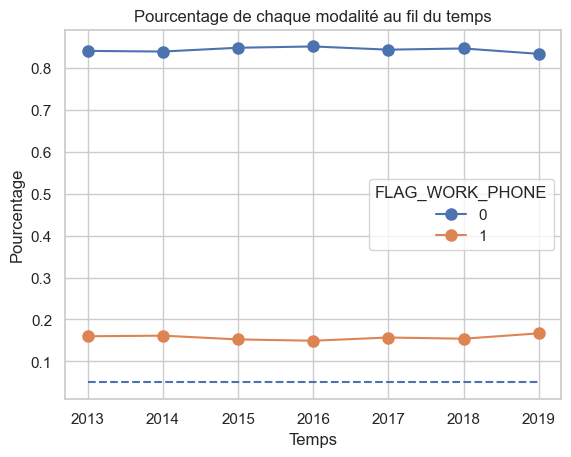

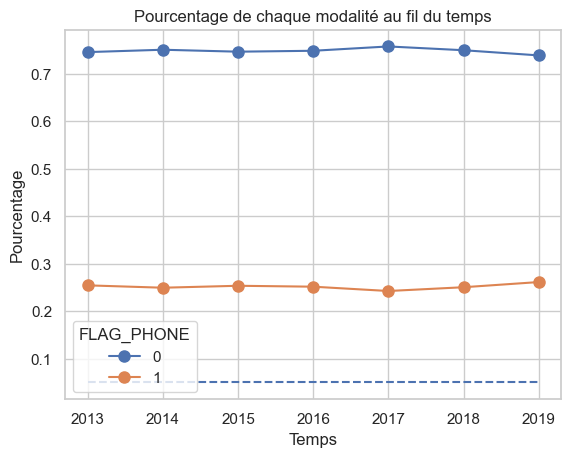

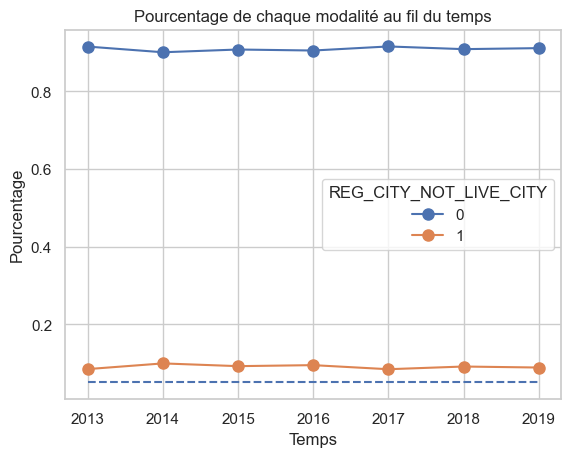

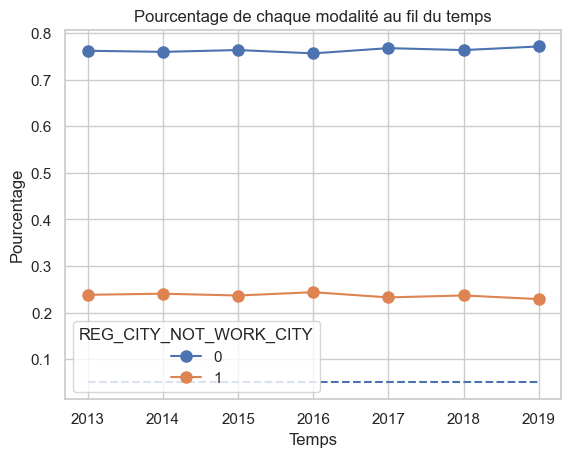

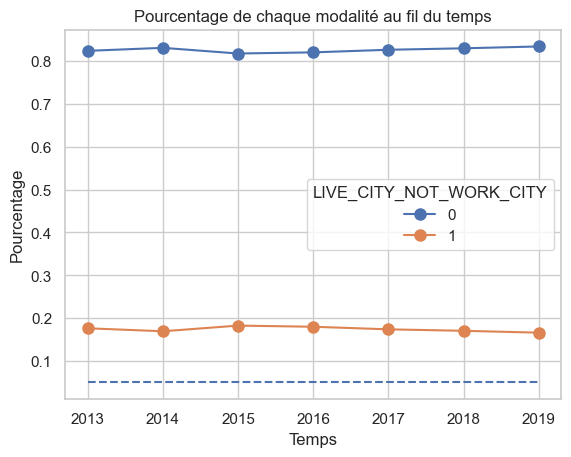

In [32]:
for var in binary_vars:
    show_volume_stability_overtime(data,var)

In [33]:
#### variables à virer : flag_mobil , flag_cont_mobil,reg_region_not_live_region, live_region_not_work_region

In [34]:
binary_volume_non_stable_vars=[]

In [35]:
# variables à virer parmi les binaires:
binary_non_stable_vars=list(set(binary_volume_non_stable_vars+binary_risk_non_stable_vars))

In [36]:
binary_vars=list(filter(lambda x : x not in binary_non_stable_vars,binary_vars))

In [37]:
data.drop(columns=binary_non_stable_vars, inplace=True)

In [38]:
numerical_vars=list(filter(lambda x : x not in binary_vars+binary_non_stable_vars,numerical_vars))

In [39]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 '

#### Model Benchmark

#### Test de stabilité des variables catégorielles à faible modalité (2-4)

In [40]:
low_category_categorical_vars=[var for var in categorical_vars+numerical_vars if  (var not in binary_vars+binary_non_stable_vars+["TARGET"]) & (data[var].nunique()>=2) & (data[var].nunique()<=4)]

In [41]:
low_category_categorical_vars

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'HAS_CHILDREN',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

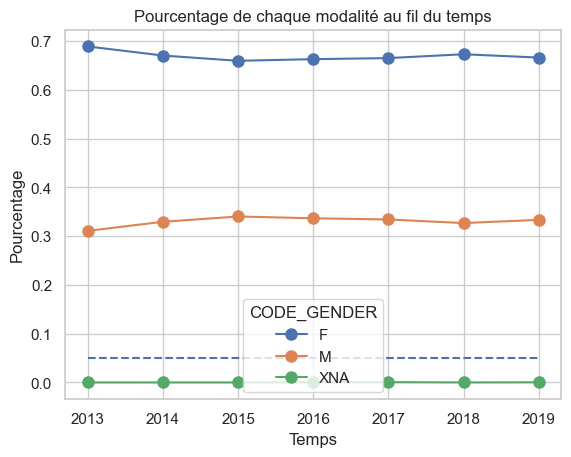

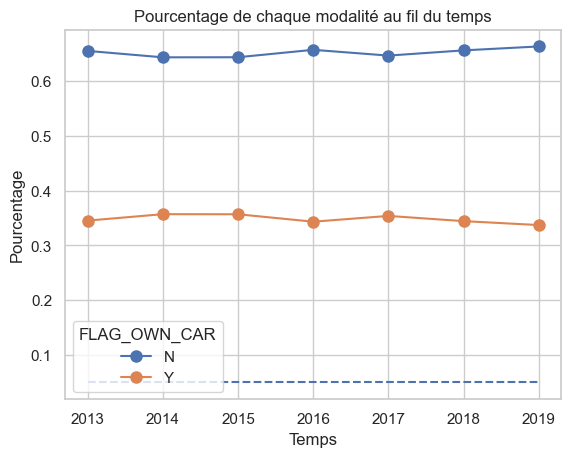

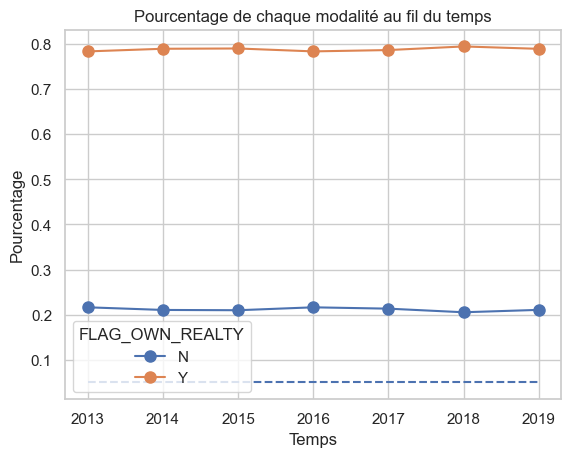

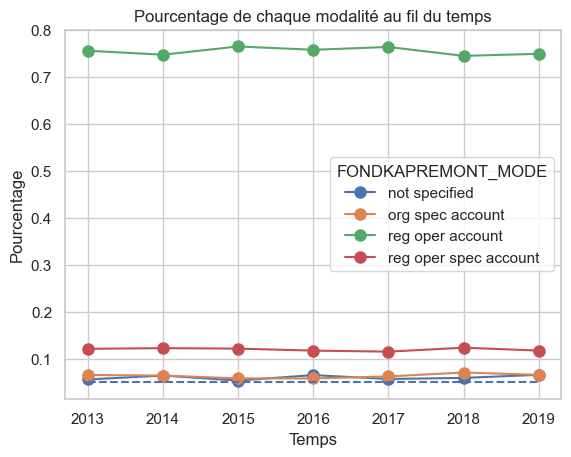

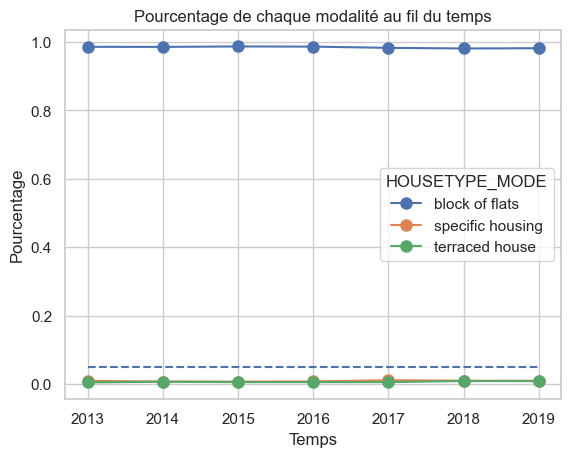

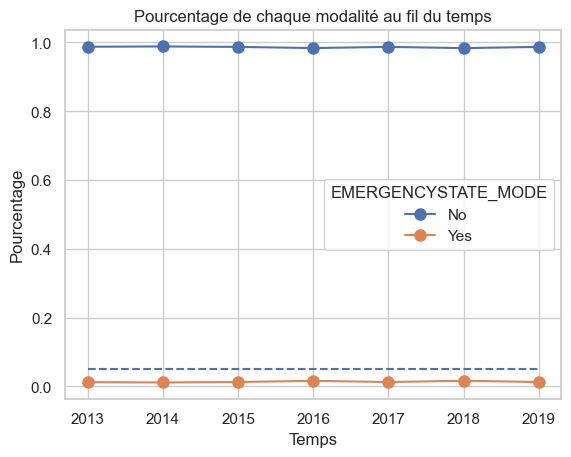

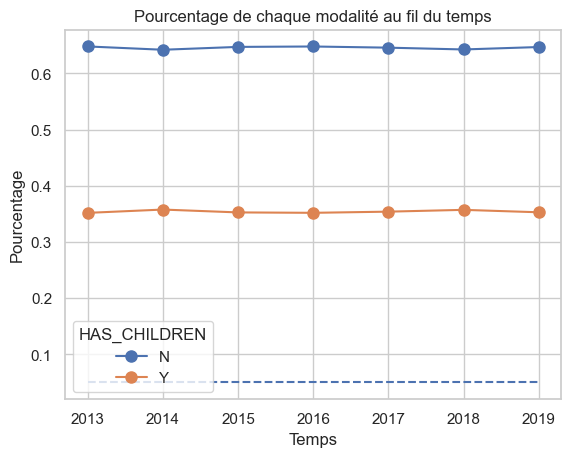

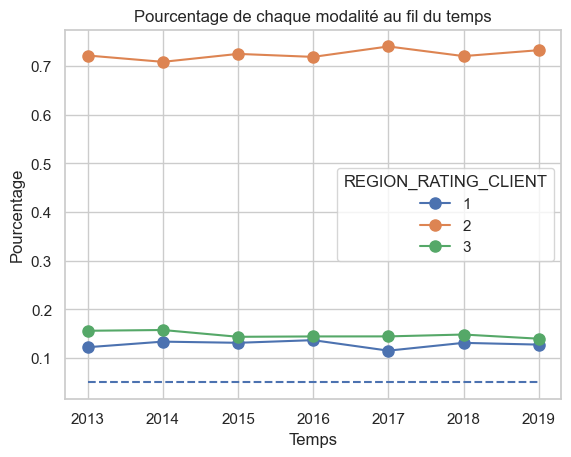

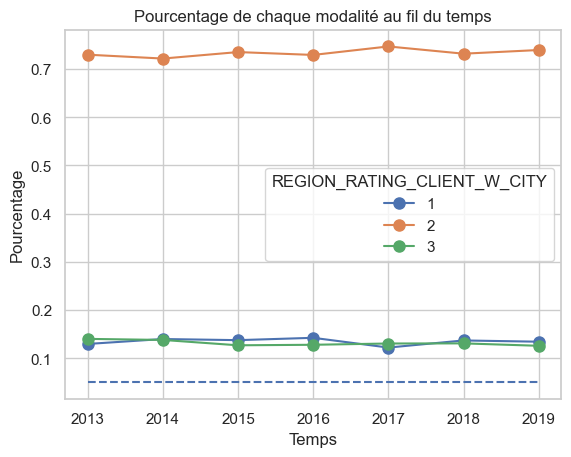

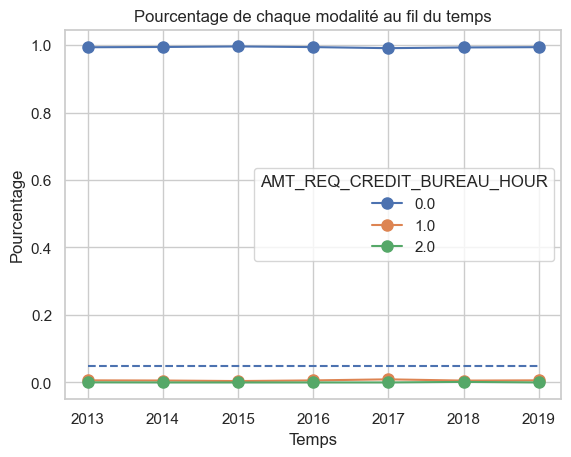

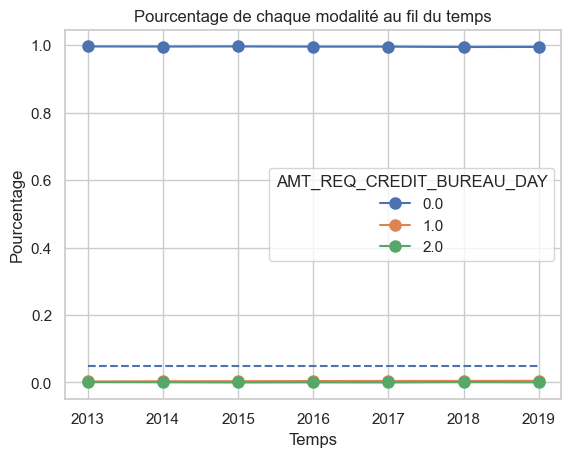

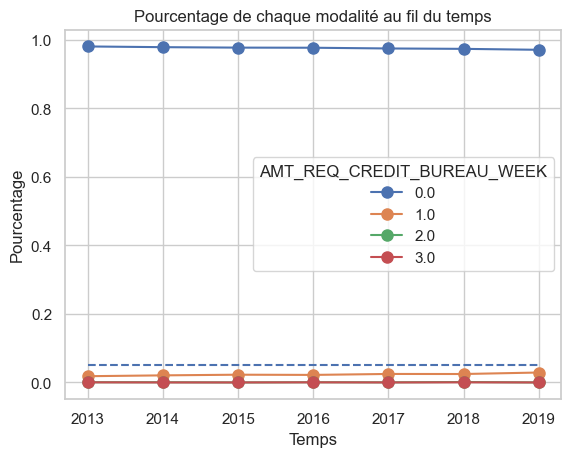

In [42]:
for colname in low_category_categorical_vars:
    show_volume_stability_overtime(data,colname)

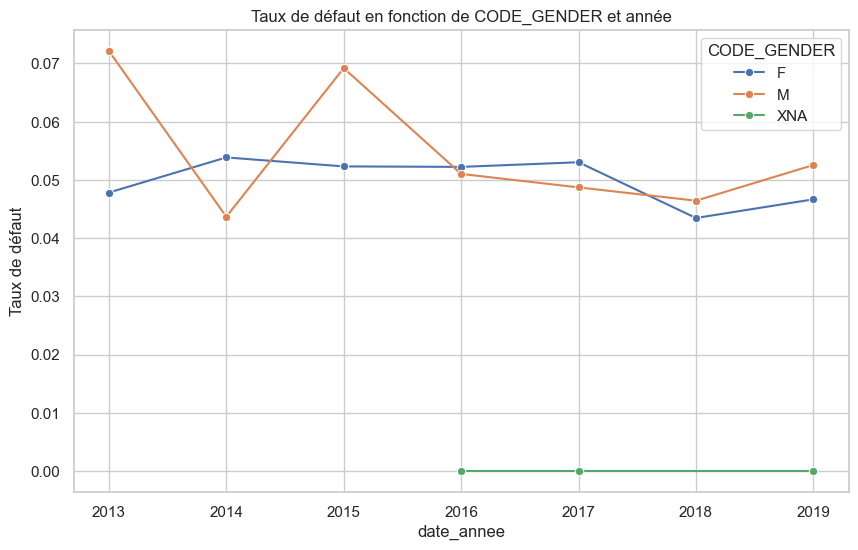

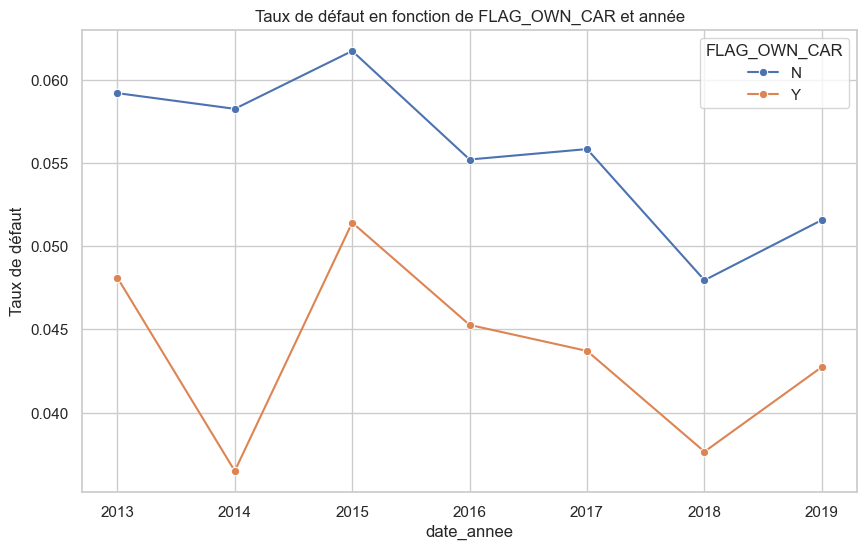

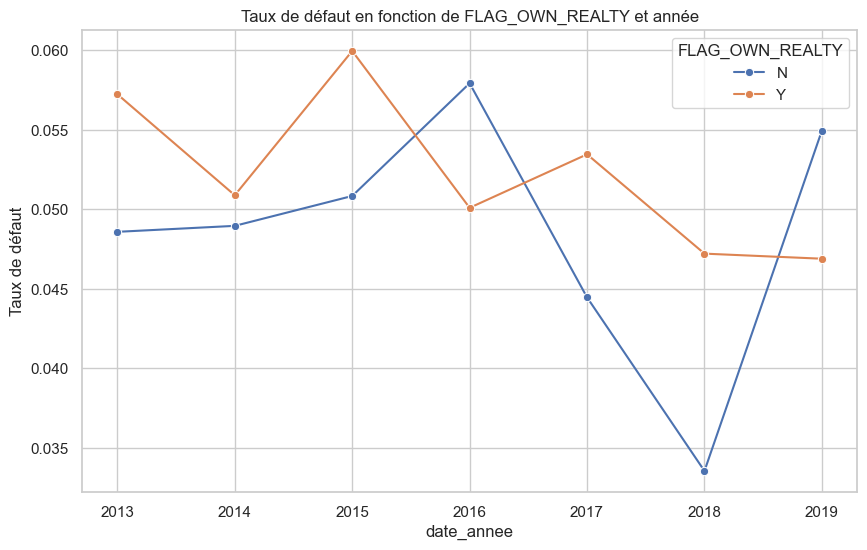

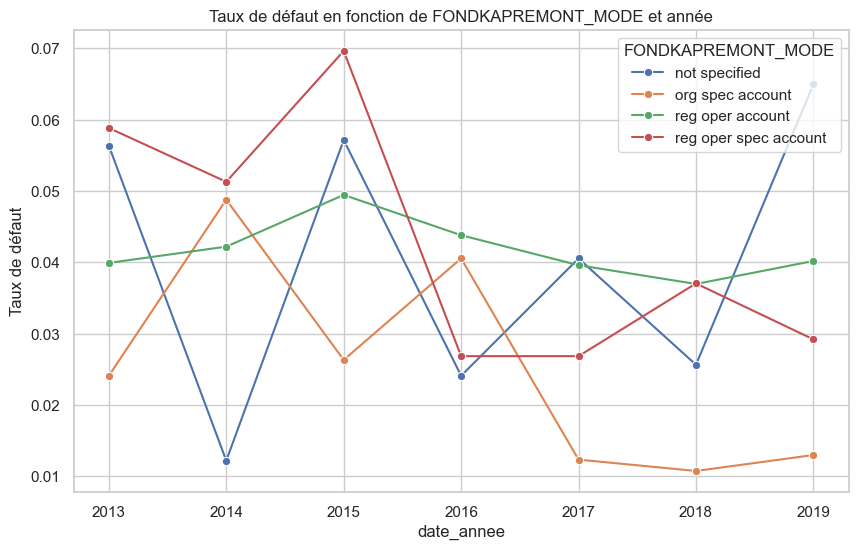

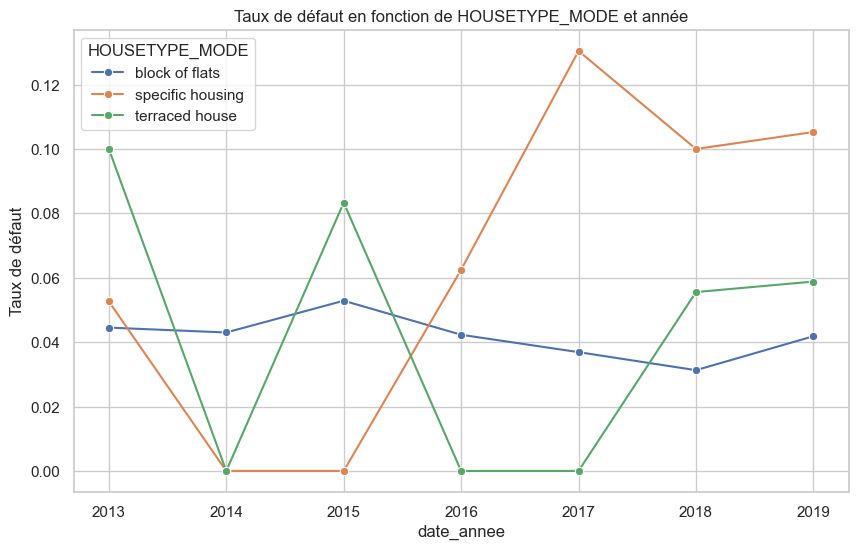

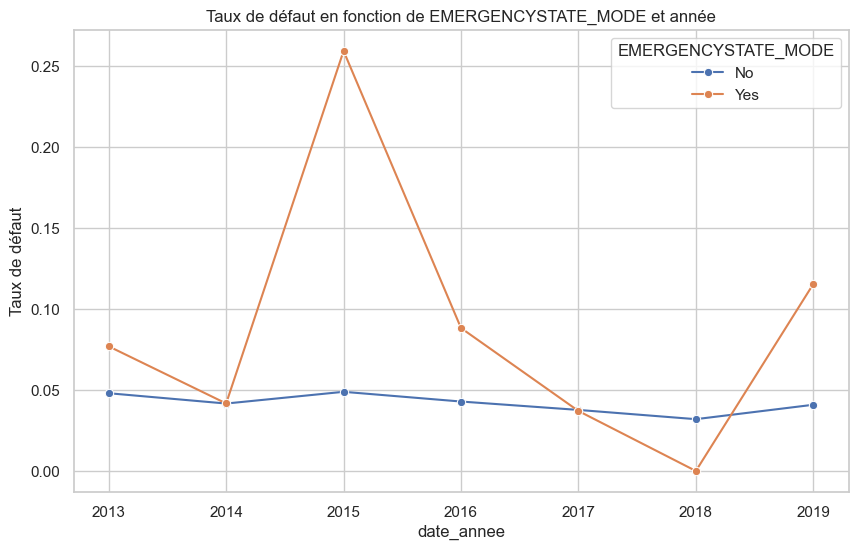

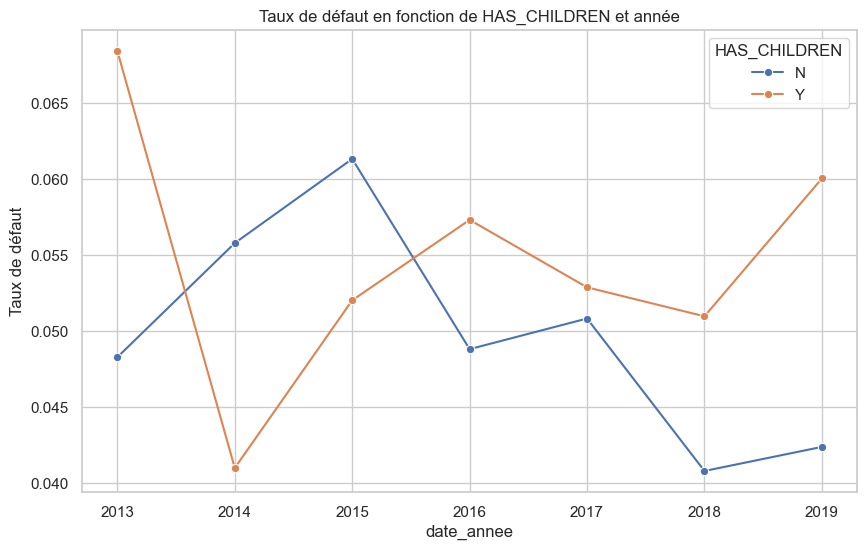

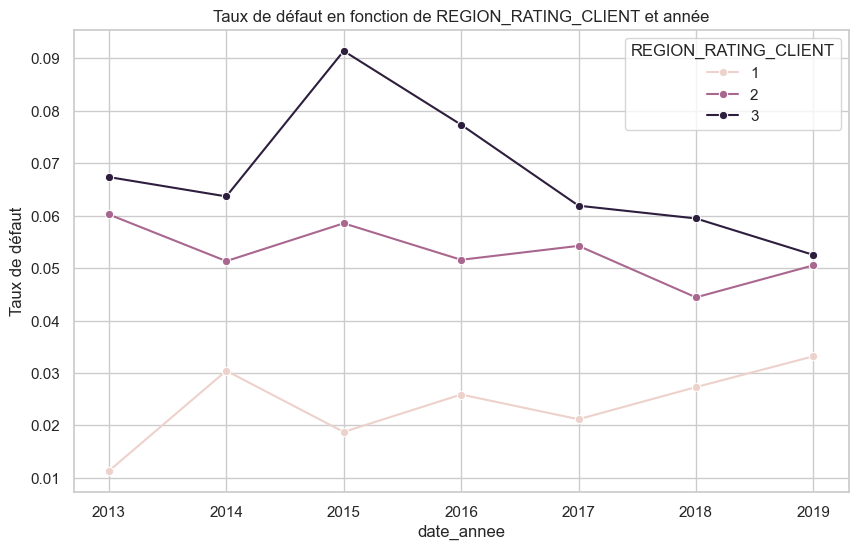

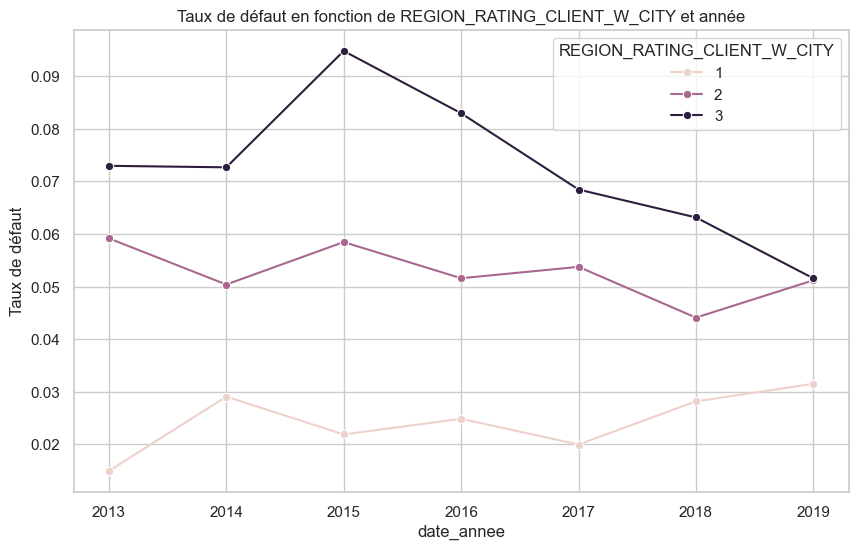

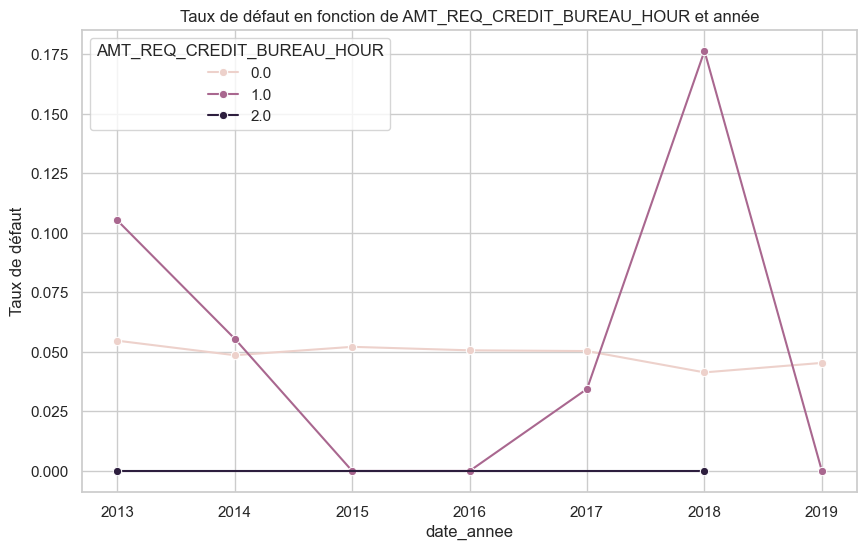

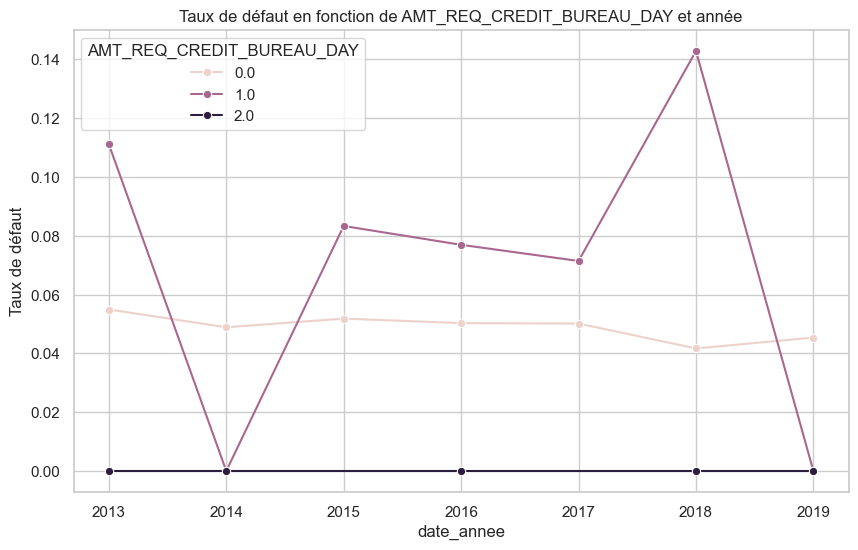

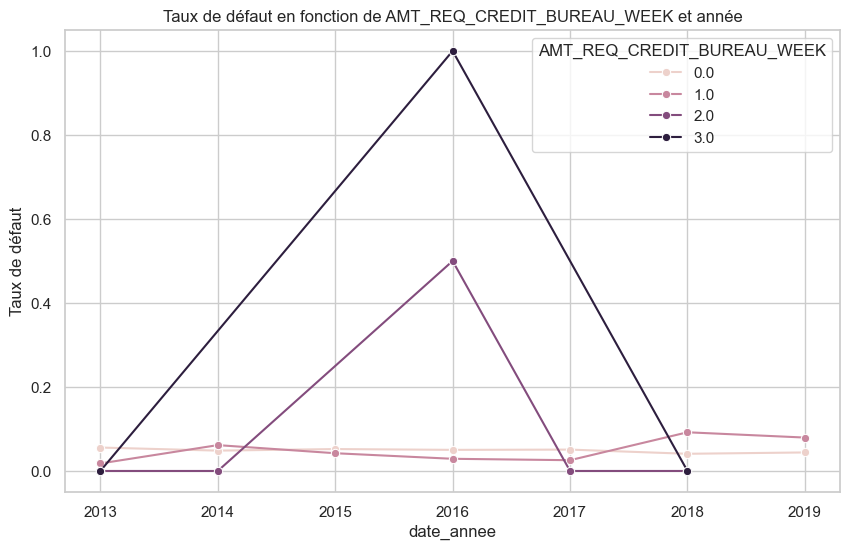

In [43]:
for col in low_category_categorical_vars:
    show_risk_stability_overtime(data,col)

In [44]:
low_category_non_stable_vars=["CODE_GENDER","FLAG_OWN_REALTY", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "EMERGENCYSTATE_MODE"]
low_category_categorical_vars=list(filter(lambda x : x not in low_category_non_stable_vars,low_category_categorical_vars))

In [45]:
low_category_categorical_vars

['FLAG_OWN_CAR',
 'HAS_CHILDREN',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [46]:
data.drop(columns=low_category_non_stable_vars)

SK_ID_CURR  TARGET FLAG_OWN_CAR  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0          239979       0            Y          416029.5    135000.0       6750.0         135000.0   Unaccompanied          Working               Higher education               Married  House / apartment                    0.031329      -12280           -940             -378.0            -3952          7.0               1                1           0             Core staff              3.0                     2                            2                    TUESDAY                       12                       0                       1                        1           Trade: type 2      0.477486      0.559106           NaN          0.2670            0.1529                       0.9985           0.9796          0.1011           0.12         0.1034         0.3333         0.3750        1.0000                0.2085          0.2290                   0.0425             0.0586           0.2721             0.1587                        0.9985            0.9804           0.1020   
1          316728       0            Y           67500.0    247500.0      12375.0         247500.0   Unaccompanied          Working  Secondary / secondary special               Married  House / apartment                    0.018850      -10116           -980            -2681.0            -2751         18.0               1                1           1                    NaN              5.0                     2                            2                   THURSDAY                       15                       0                       1                        1  Business Entity Type 3      0.247592      0.796628      0.294083             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN               NaN              NaN   
2          147573       0            N          157500.0    180000.0       9000.0         180000.0   Unaccompanied          Working  Secondary / secondary special               Married  House / apartment                    0.035792      -12180          -5589            -1200.0            -4713          NaN               1                0           0                    NaN              3.0                     2                            2                   THURSDAY                       14                       0                       0                        0  Business Entity Type 3      0.378587      0.724057      0.651260          0.0412            0.0492                       0.9921           0.8912          0.0229           0.00         0.1379         0.1667         0.2083        0.0512                0.0336          0.0462                   0.0000             0.0000           0.0420             0.0511                        0.9921            0.8955           0.0231   
3          197356       0            Y     

#### Test de stabilité des autres variables catégorielles

In [47]:
categorical_vars=list(filter(lambda x : x not in binary_non_stable_vars+binary_vars+low_category_categorical_vars+low_category_non_stable_vars, categorical_vars))

In [48]:
for col in categorical_vars:
    print(data[col].value_counts(normalize=True))
    print(40*"=")

NAME_TYPE_SUITE
Unaccompanied      0.826030
Family             0.119364
Spouse, partner    0.033588
Children           0.010311
Other_B            0.006186
Other_A            0.003529
Group of people    0.000991
Name: proportion, dtype: float64
NAME_INCOME_TYPE
Working                 0.550302
Commercial associate    0.271617
Pensioner               0.113877
State servant           0.063339
Businessman             0.000393
Unemployed              0.000236
Maternity leave         0.000118
Student                 0.000118
Name: proportion, dtype: float64
NAME_EDUCATION_TYPE
Secondary / secondary special    0.622673
Higher education                 0.327260
Incomplete higher                0.042292
Lower secondary                  0.007108
Academic degree                  0.000668
Name: proportion, dtype: float64
NAME_FAMILY_STATUS
Married                 0.605906
Single / not married    0.195201
Civil marriage          0.096128
Separated               0.066049
Widow                   0.0

In [49]:
for col in categorical_vars:
    n=data.shape[0]
    contingency_table=pd.crosstab(data["TARGET"], data[col])
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True) #Application d'une correction de Yates par rapport à la faible représentation des classes
    k, r = contingency_table.shape
    v_cramer = np.sqrt(chi2 / (n * min(k-1, r-1)))
    print(f"\nCrosstab for {col}:\n")
    print(contingency_table)
    print("\n" + "-"*40)
    print(f"\nChi-squared: {chi2}")
    print(f"P-value: {p}")
    print(f"Cramer's V: {v_cramer}")
    print("\n" + "="*80)
    


Crosstab for NAME_TYPE_SUITE:

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  Spouse, partner  Unaccompanied
TARGET                                                                                              
0                     250    2855               23       88      139              809          19760
1                      10     155                2        1       17               38           1070

----------------------------------------

Chi-squared: 15.633179528614606
P-value: 0.01586429924218701
Cramer's V: 0.024776690181883956


Crosstab for NAME_INCOME_TYPE:

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  Pensioner  State servant  Student  Unemployed  Working
TARGET                                                                                                                      
0                          10                  6624                3       2784           1562        3           6    13163
1                 

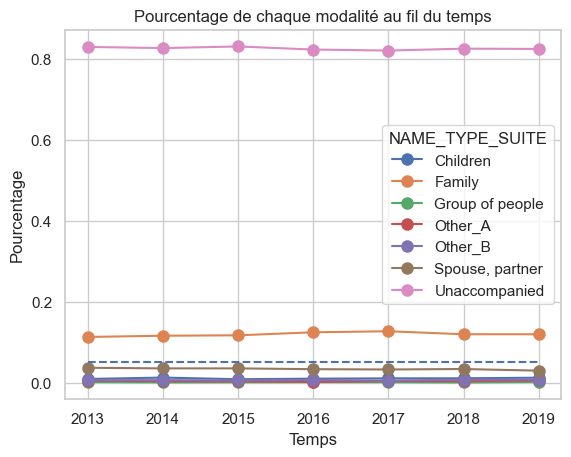

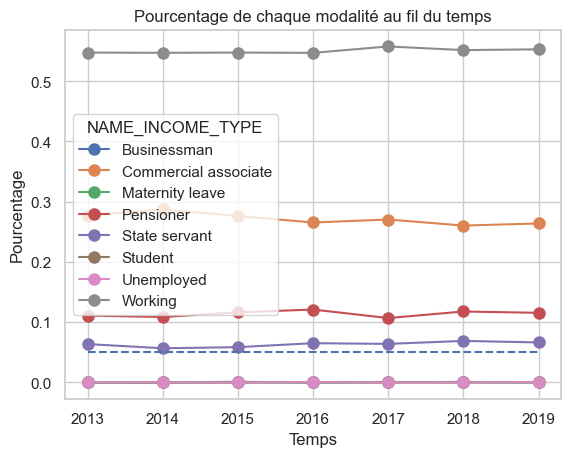

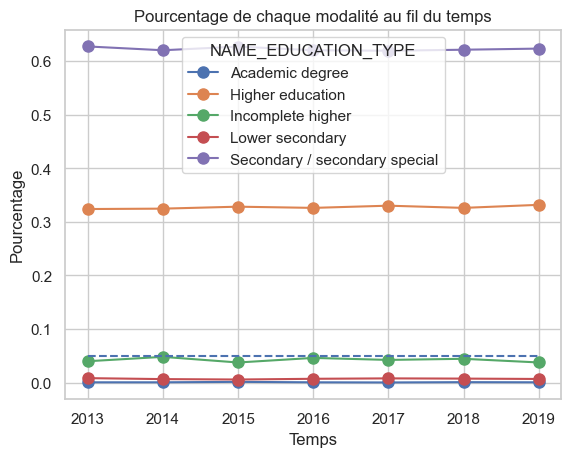

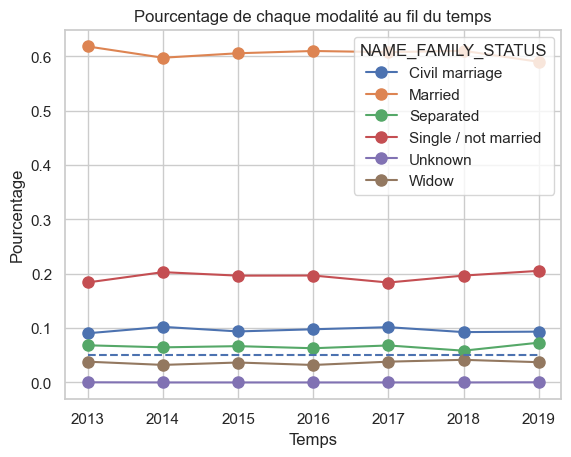

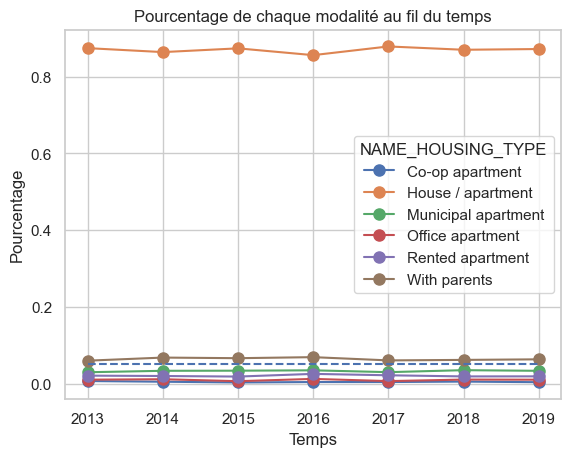

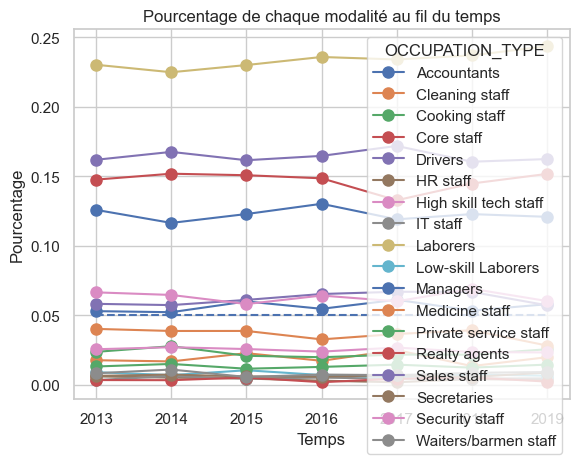

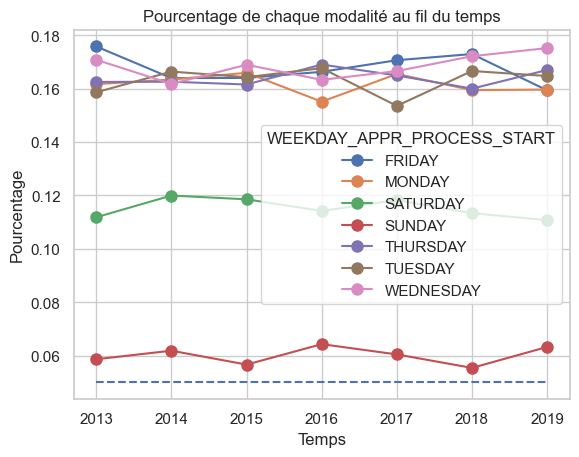

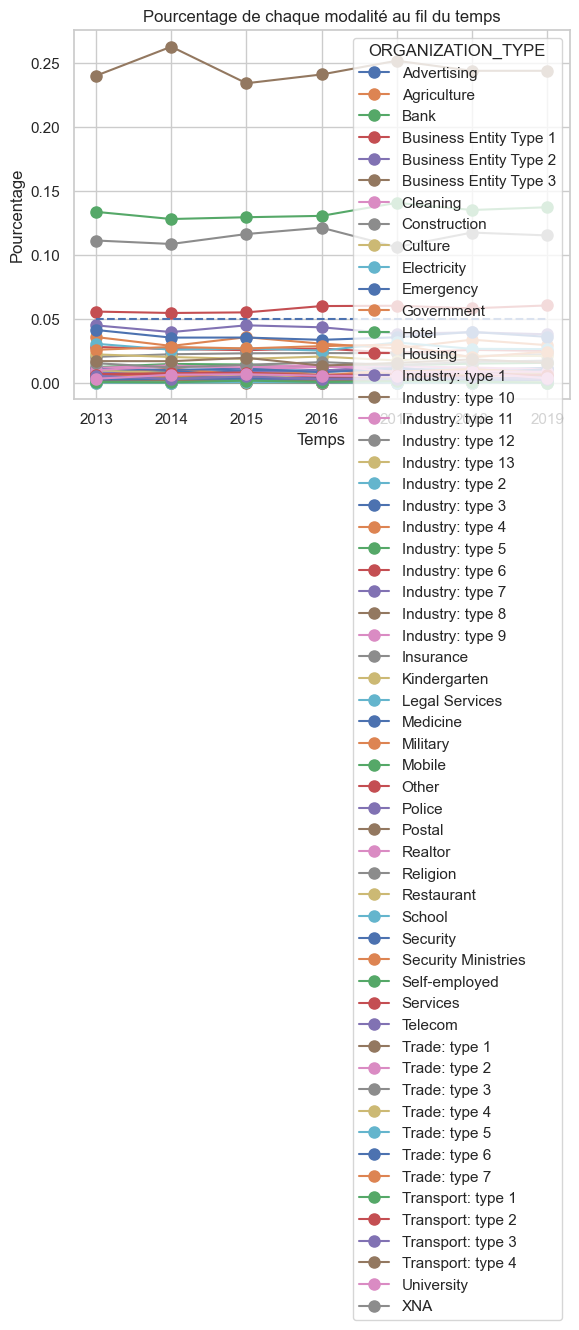

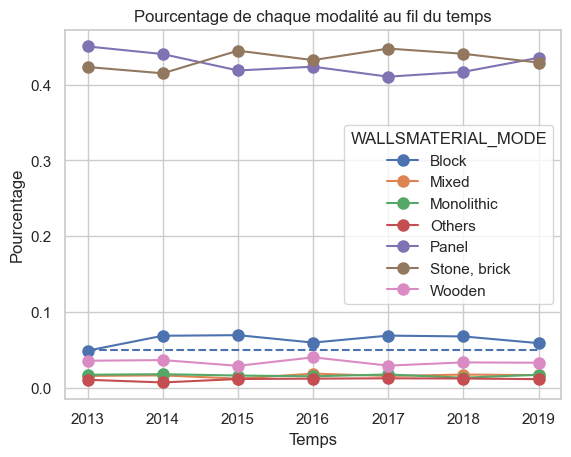

In [50]:
for col in categorical_vars:
    show_volume_stability_overtime(data,col)

In [51]:
data["OCCUPATION_TYPE"].value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                 0.233646
Sales staff              0.164415
Core staff               0.146830
Managers                 0.122570
High skill tech staff    0.063245
Drivers                  0.061868
Accountants              0.056041
Medicine staff           0.036337
Security staff           0.025107
Cooking staff            0.022989
Cleaning staff           0.018963
Private service staff    0.013401
Waiters/barmen staff     0.008104
Low-skill Laborers       0.007522
Secretaries              0.006674
IT staff                 0.004661
HR staff                 0.003973
Realty agents            0.003655
Name: proportion, dtype: float64

In [52]:
data["REALTY"]="OWN_REALTY_"+data["FLAG_OWN_REALTY"]+"-TYPE_"+data["NAME_HOUSING_TYPE"]

In [53]:
data["REALTY"].value_counts(normalize=True)

REALTY
OWN_REALTY_Y-TYPE_House / apartment      0.723121
OWN_REALTY_N-TYPE_House / apartment      0.146705
OWN_REALTY_N-TYPE_With parents           0.034320
OWN_REALTY_Y-TYPE_With parents           0.029490
OWN_REALTY_Y-TYPE_Municipal apartment    0.016257
OWN_REALTY_N-TYPE_Municipal apartment    0.016257
OWN_REALTY_N-TYPE_Rented apartment       0.010445
OWN_REALTY_Y-TYPE_Rented apartment       0.009817
OWN_REALTY_Y-TYPE_Office apartment       0.006087
OWN_REALTY_Y-TYPE_Co-op apartment        0.003299
OWN_REALTY_N-TYPE_Office apartment       0.003259
OWN_REALTY_N-TYPE_Co-op apartment        0.000942
Name: proportion, dtype: float64

In [54]:
data["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)

In [55]:
group_occupation_type={
    0: ['Accountants', 'HR staff', 'High skill tech staff'],
 1: ['Managers', 'Core staff', 'Private service staff', 'Unknown',
        'Medicine staff', 'IT staff', 'Secretaries'],
 2: ['Realty agents', 'Cleaning staff', 'Sales staff', 'Laborers',
        'Cooking staff', 'Security staff'],
 3: ['Drivers', 'Waiters/barmen staff', 'Low-skill Laborers'],
}

In [56]:
data["OCCUPATION_TYPE"]=data["OCCUPATION_TYPE"].map({value: key for key, values in group_occupation_type.items() for value in values})

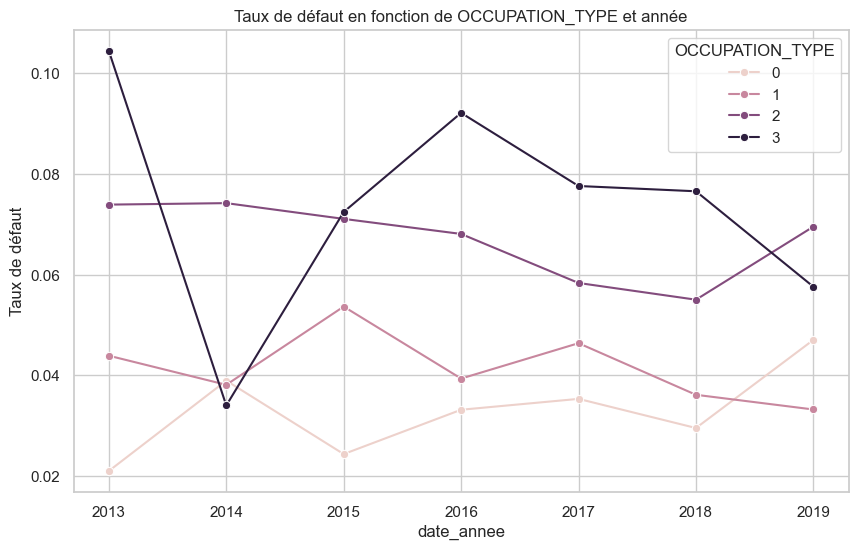

In [57]:
show_risk_stability_overtime(data,"OCCUPATION_TYPE")

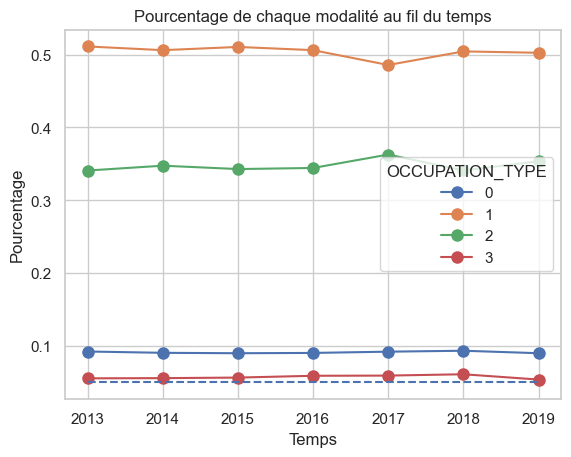

In [58]:
show_volume_stability_overtime(data,"OCCUPATION_TYPE")

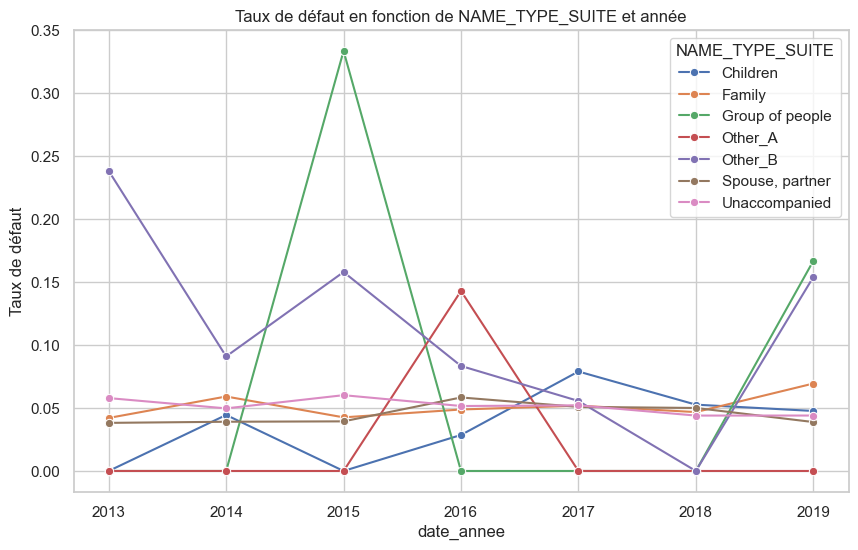

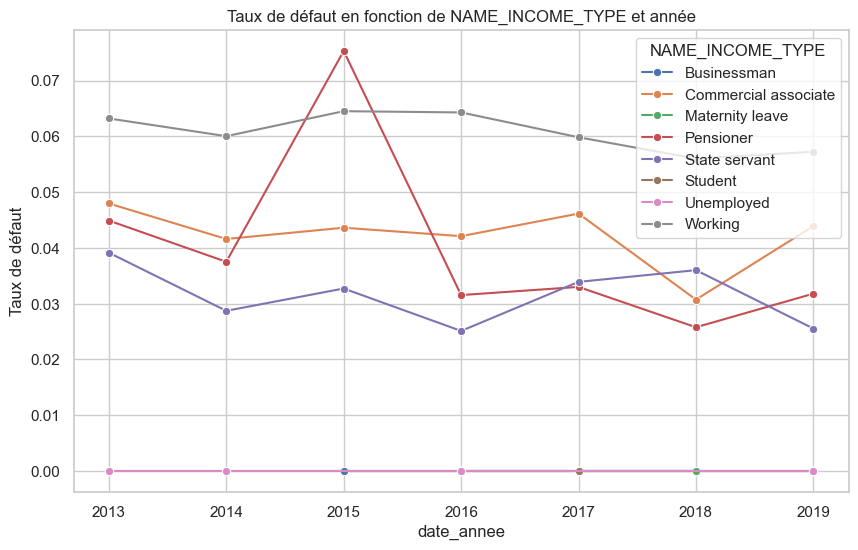

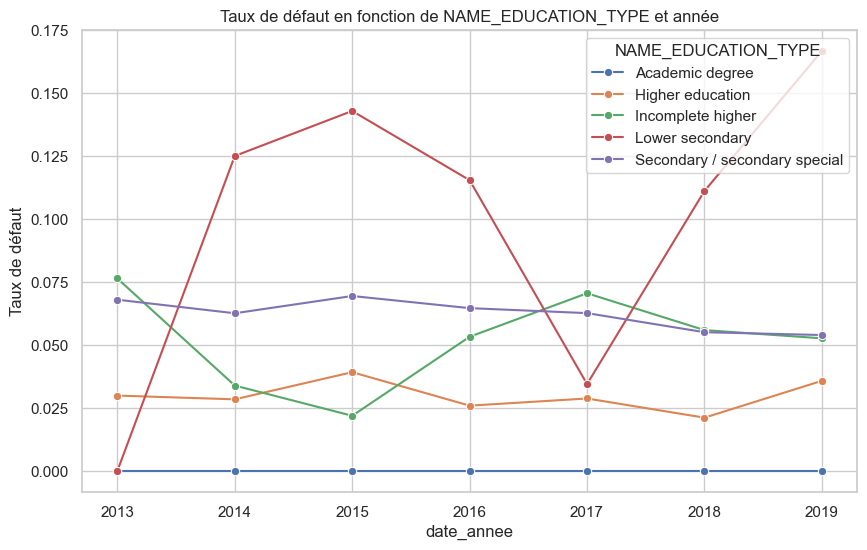

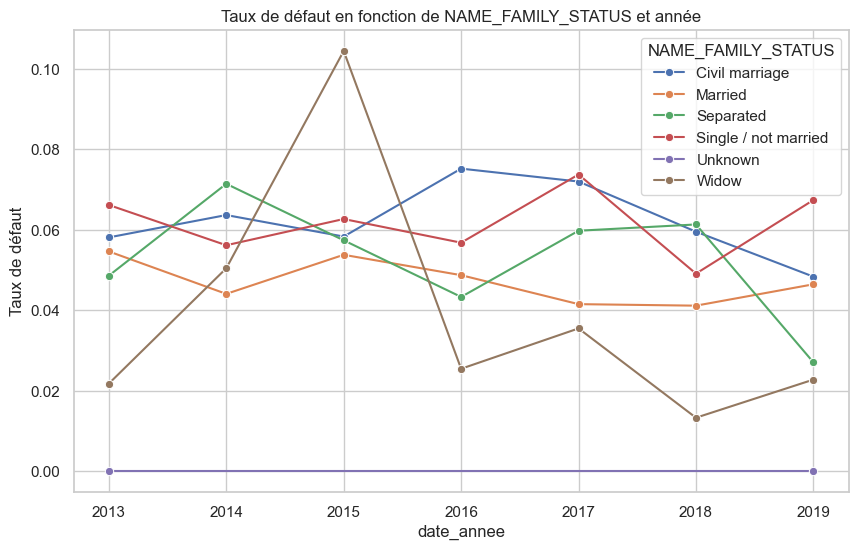

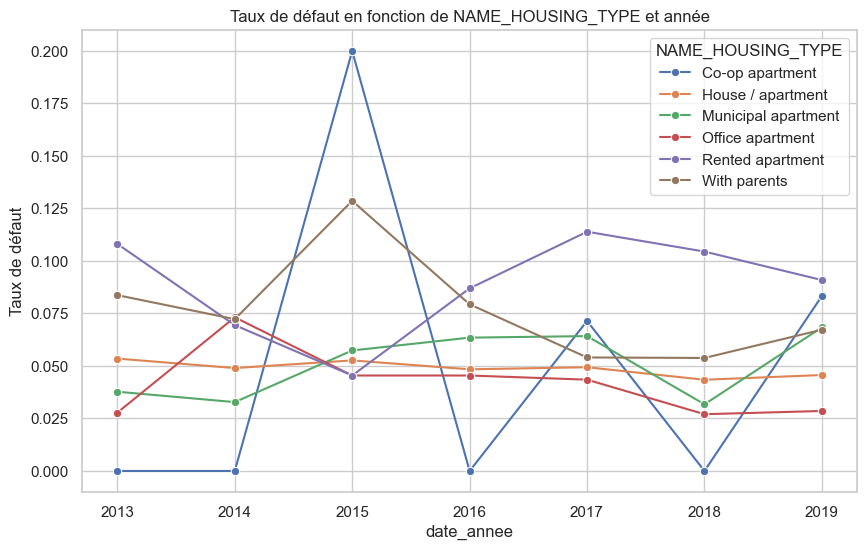

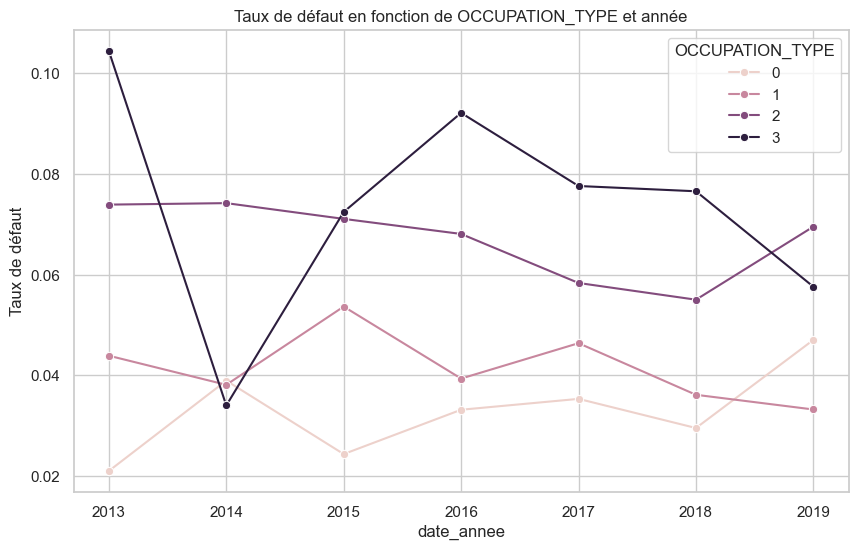

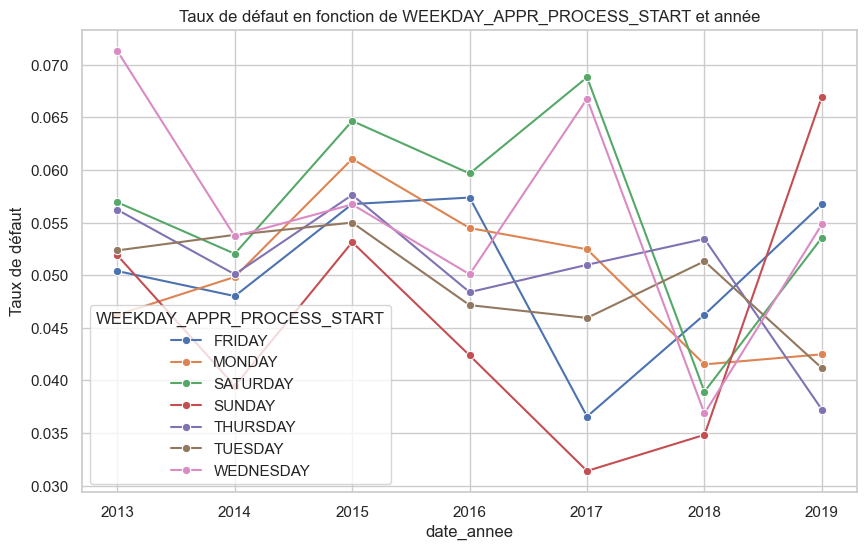

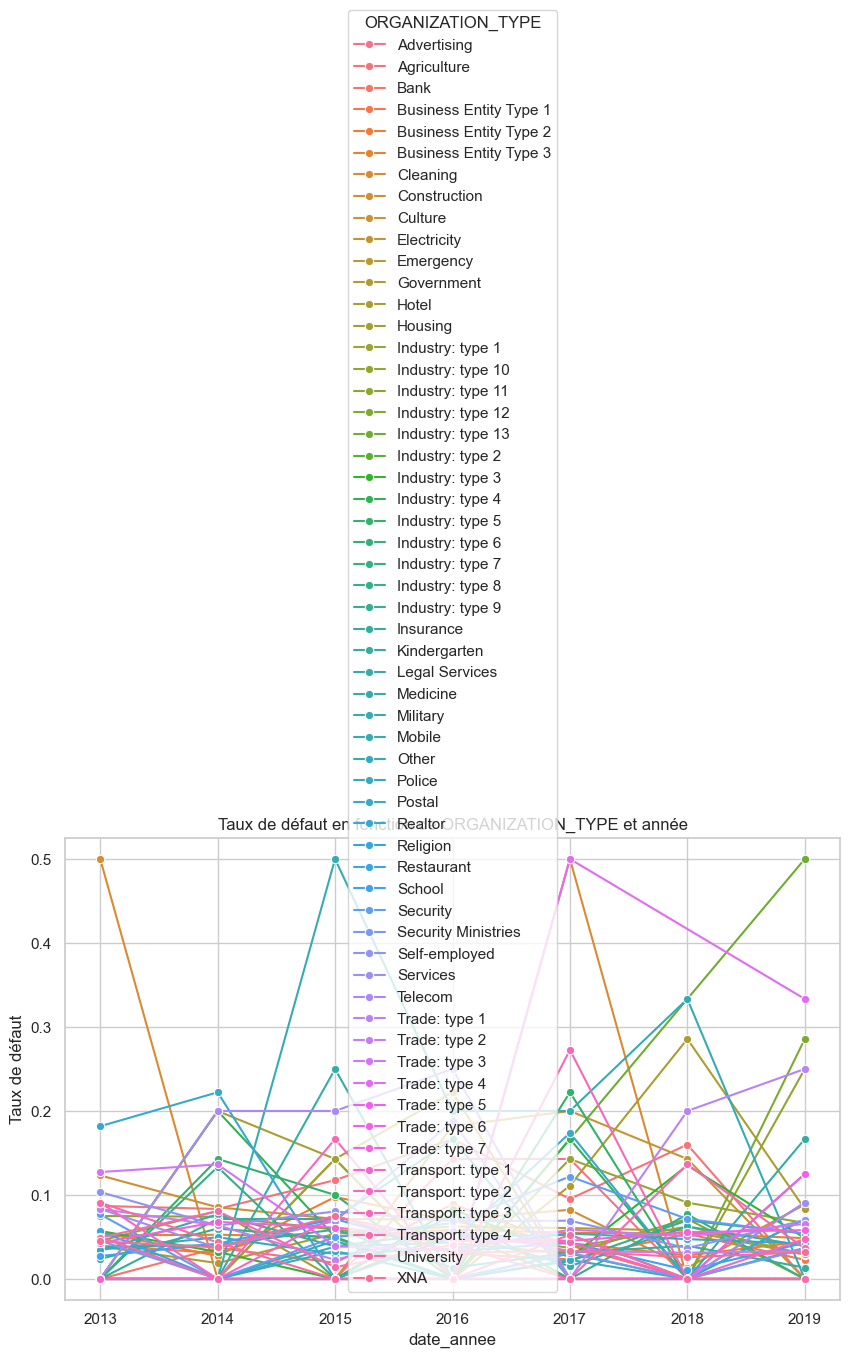

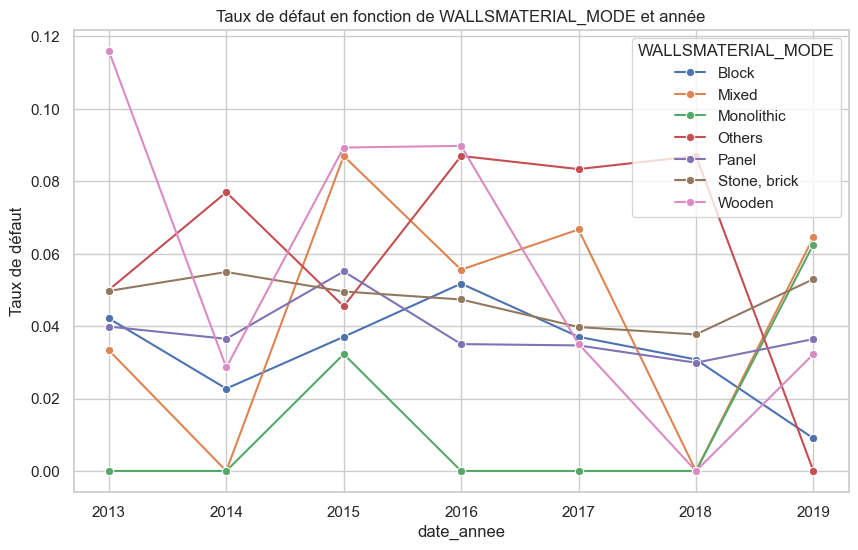

In [59]:
for col in categorical_vars:
    show_risk_stability_overtime(data,col)

In [60]:
group_education_type={
    "Graduated" : ["Academic degree", "Higher education"],
    "Non graduated":["Lower secondary", "Secondary / secondary special", "Incomplete higher"]
}

In [61]:
data["NAME_EDUCATION_TYPE"]=data["NAME_EDUCATION_TYPE"].map({value: key for key, values in group_education_type.items() for value in values})

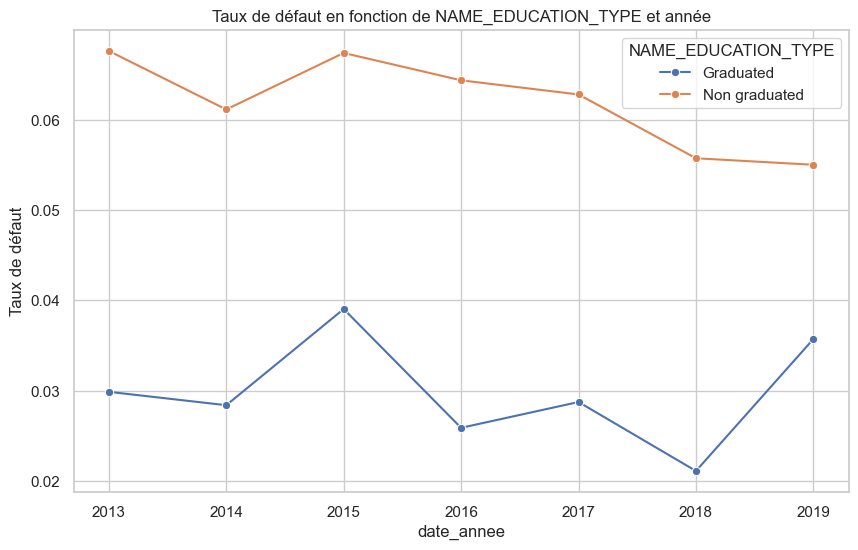

In [62]:
show_risk_stability_overtime(data,"NAME_EDUCATION_TYPE")

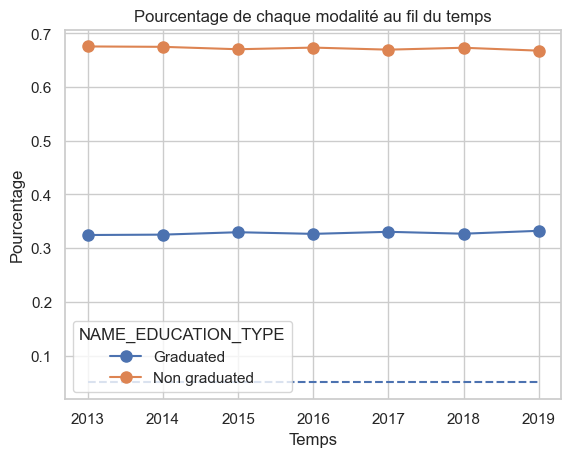

In [63]:
show_volume_stability_overtime(data,"NAME_EDUCATION_TYPE")

In [64]:
group_family_status={
    "Already_Married": ["Civil marriage", "Married","Separated", "Widow"],
    "Single" :["Single / not married", "Unknown"]
    # "Separated": []
}

In [65]:
data["NAME_FAMILY_STATUS_2"]=data["NAME_FAMILY_STATUS"].map({value: key for key, values in group_family_status.items() for value in values})

In [66]:
data["NAME_FAMILY_STATUS"].value_counts(normalize=True)

NAME_FAMILY_STATUS
Married                 0.605906
Single / not married    0.195201
Civil marriage          0.096128
Separated               0.066049
Widow                   0.036637
Unknown                 0.000079
Name: proportion, dtype: float64

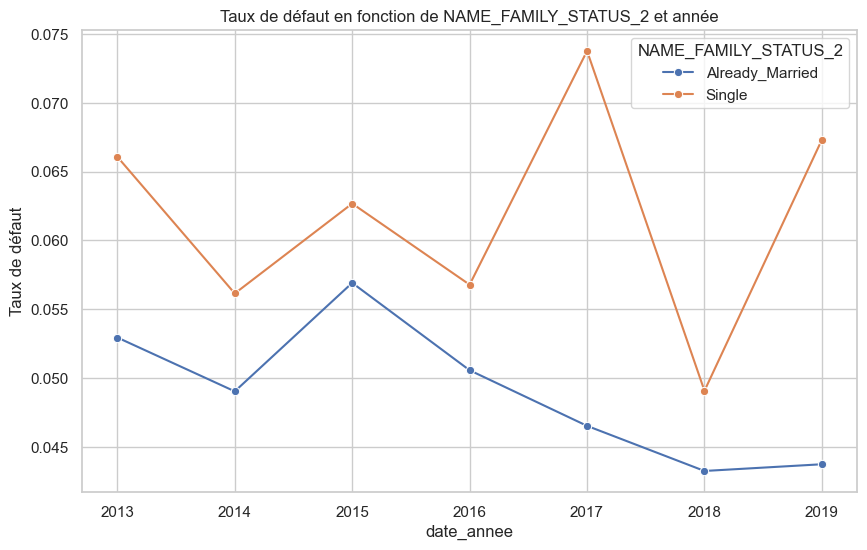

In [67]:
show_risk_stability_overtime(data,"NAME_FAMILY_STATUS_2" )

In [68]:
cramers_v(pd.crosstab(data["HAS_CHILDREN"], data["NAME_FAMILY_STATUS_2"]))

0.20607582362995183

In [69]:
pd.crosstab(data["HAS_CHILDREN"], data["NAME_FAMILY_STATUS_2"])

NAME_FAMILY_STATUS_2  Already_Married  Single
HAS_CHILDREN                                 
N                               12241    4208
Y                                8252     765

In [70]:
data["FAM_STATS_CHILD"]=data["NAME_FAMILY_STATUS_2"]+"-"+"HAS_CHILDREN_"+data["HAS_CHILDREN"] 

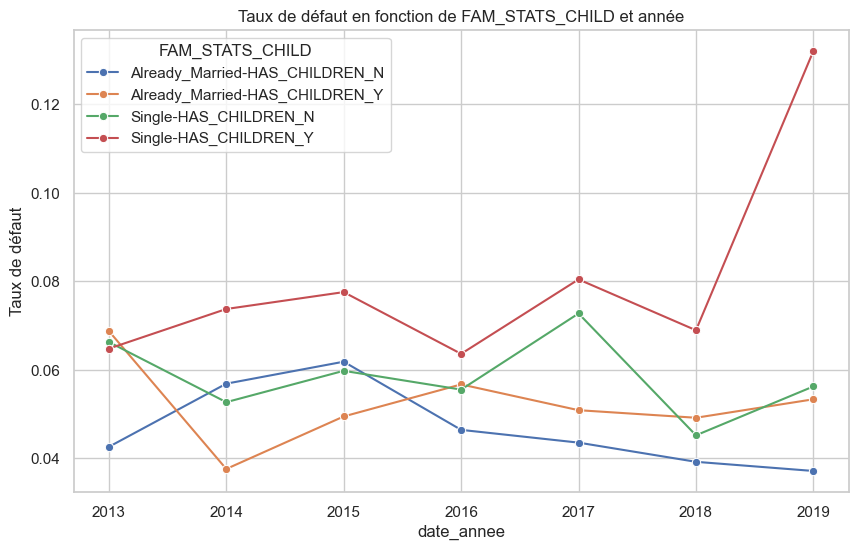

In [71]:
show_risk_stability_overtime(data, "FAM_STATS_CHILD")

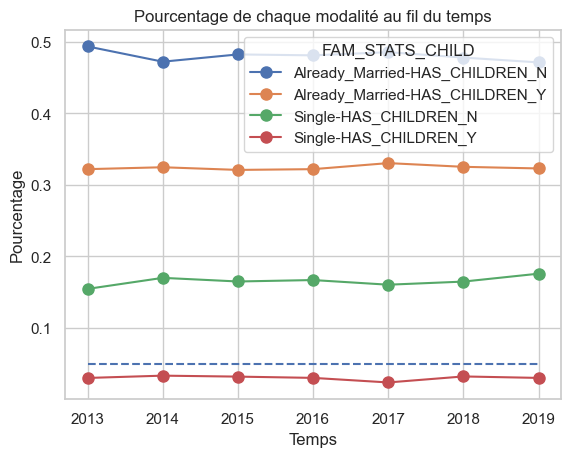

In [72]:
show_volume_stability_overtime(data, "FAM_STATS_CHILD")

In [73]:
data["FAM_STATS_CHILD"].value_counts(normalize=True)

FAM_STATS_CHILD
Already_Married-HAS_CHILDREN_N    0.48068
Already_Married-HAS_CHILDREN_Y    0.32404
Single-HAS_CHILDREN_N             0.16524
Single-HAS_CHILDREN_Y             0.03004
Name: proportion, dtype: float64

In [74]:
data["FAM_STATS_CHILD"]=data["FAM_STATS_CHILD"].apply(lambda x : "Single" if x in ["Single-HAS_CHILDREN_N","Single-HAS_CHILDREN_Y"] else x)

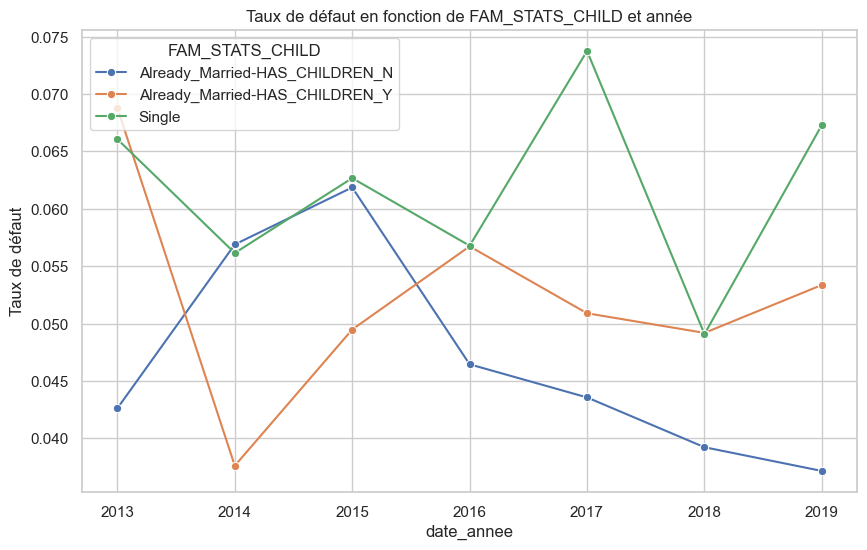

In [75]:
show_risk_stability_overtime(data, "FAM_STATS_CHILD")

In [76]:
cramers_v(pd.crosstab(data["TARGET"], data["NAME_FAMILY_STATUS_2"]))

0.021281114322089137

In [77]:
cramers_v(pd.crosstab(data["TARGET"], data["HAS_CHILDREN"]))

0.007977882743787766

In [78]:
cramers_v(pd.crosstab(data["TARGET"], data["FAM_STATS_CHILD"]))

0.02316397080003252

In [79]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["NAME_FAMILY_STATUS_2"]))

0.009652796004234063

In [80]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["FAM_STATS_CHILD"]))

0.012109389591414773

In [81]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["HAS_CHILDREN"]))

0.0021593269442960394

In [82]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["NAME_EDUCATION_TYPE"]))

0.11153977679903995

In [83]:
for col in categorical_vars:
    print(data[[col,"TARGET"]].groupby(by=col).agg(np.mean).sort_values(by="TARGET", ascending=False))
    print(60*"=")

                   TARGET
NAME_TYPE_SUITE          
Other_B          0.108974
Group of people  0.080000
Family           0.051495
Unaccompanied    0.051368
Spouse, partner  0.044864
Children         0.038462
Other_A          0.011236
                        TARGET
NAME_INCOME_TYPE              
Working               0.060725
Commercial associate  0.042359
Pensioner             0.040000
State servant         0.031618
Businessman           0.000000
Maternity leave       0.000000
Student               0.000000
Unemployed            0.000000
                       TARGET
NAME_EDUCATION_TYPE          
Non graduated        0.062051
Graduated            0.029817
                        TARGET
NAME_FAMILY_STATUS            
Civil marriage        0.062500
Single / not married  0.061557
Separated             0.052319
Married               0.047181
Widow                 0.038585
Unknown               0.000000
                       TARGET
NAME_HOUSING_TYPE            
Rented apartment     0.08914

#### Test de combinaison de variables numériques

In [84]:
social_vars=["OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"
]

In [85]:
for col in social_vars:
    print(mannwhitney_test(data,col, "TARGET"))

Variable: OBS_30_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 14362363.5
P-value: 0.011401323430725379
None
Variable: DEF_30_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 14102946.0
P-value: 3.852422326826885e-10
None
Variable: OBS_60_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 14364795.5
P-value: 0.011622617805030684
None
Variable: DEF_60_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 14151359.5
P-value: 1.615147225768734e-11
None
Variable: DAYS_LAST_PHONE_CHANGE
Mann-Whitney U-statistic: 13484250.0
P-value: 1.2267892954611438e-19
None


In [86]:
data["DAYS_LAST_PHONE_CHANGE"].fillna(data["DAYS_LAST_PHONE_CHANGE"].min(), inplace=True)

In [87]:
data["AMT_INCOME_TOTAL"].describe()

count    2.546600e+04
mean     1.664144e+05
std      1.279788e+05
min      2.700000e+04
25%      9.900000e+04
50%      1.350000e+05
75%      2.025000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [88]:
data["AMT_CREDIT_TO_INCOME"]=(data["AMT_CREDIT"]+data["CB_AMT_CREDIT_SUM"])/data["AMT_INCOME_TOTAL"]

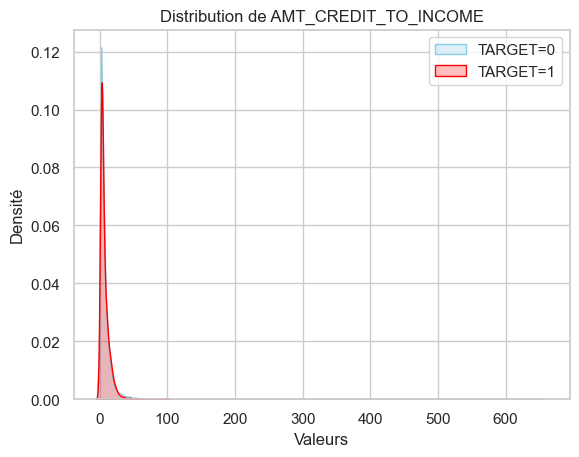

In [89]:
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data.loc[data["TARGET"]==0, "AMT_CREDIT_TO_INCOME"], color='skyblue', label='TARGET=0', fill=True)
sns.kdeplot(data.loc[data["TARGET"]==1, "AMT_CREDIT_TO_INCOME"], color='red', label='TARGET=1', fill=True)

plt.title("Distribution de AMT_CREDIT_TO_INCOME")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()


In [90]:
median_imputer=SimpleImputer(strategy="median").set_output(transform="pandas")
data["AMT_GOODS_PRICE"]=median_imputer.fit_transform(data["AMT_GOODS_PRICE"].to_numpy().reshape(-1,1))

In [91]:
data["AMT_GOODS_PRICE"].isna().mean()

0.0

In [92]:
data["AMT_GOODS_PRICE"].describe()

count    2.546600e+04
mean     3.247074e+05
std      2.364431e+05
min      4.500000e+04
25%      1.800000e+05
50%      2.700000e+05
75%      3.600000e+05
max      2.250000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [93]:
data["AMT_CREDIT_NORM"]=data["AMT_CREDIT"]/data["AMT_GOODS_PRICE"]
data["AMT_ANNUITY"]=(data["AMT_ANNUITY"]+data["CB_AMT_ANNUITY"])/data["AMT_INCOME_TOTAL"]
data["AMT_INCOME_TOTAL_NORM"]=data["AMT_INCOME_TOTAL"]/data["AMT_GOODS_PRICE"]

In [94]:
data["BORROWER_AGE"]=data["DAYS_BIRTH"].apply(np.abs)//365
data["BORROWER_SENIORITY"]=data["DAYS_EMPLOYED"].apply(np.abs)//365
data["BORROWER_FIDELITY"]=data["DAYS_REGISTRATION"].apply(np.abs)//365

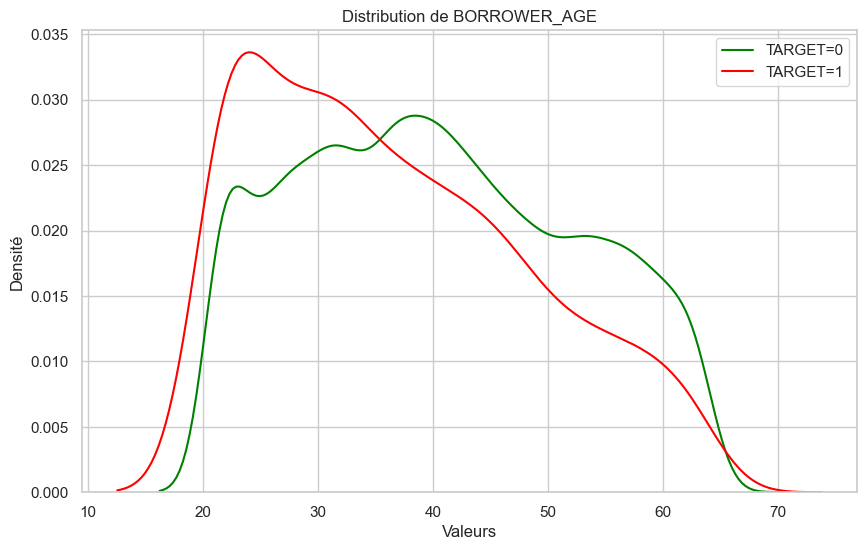

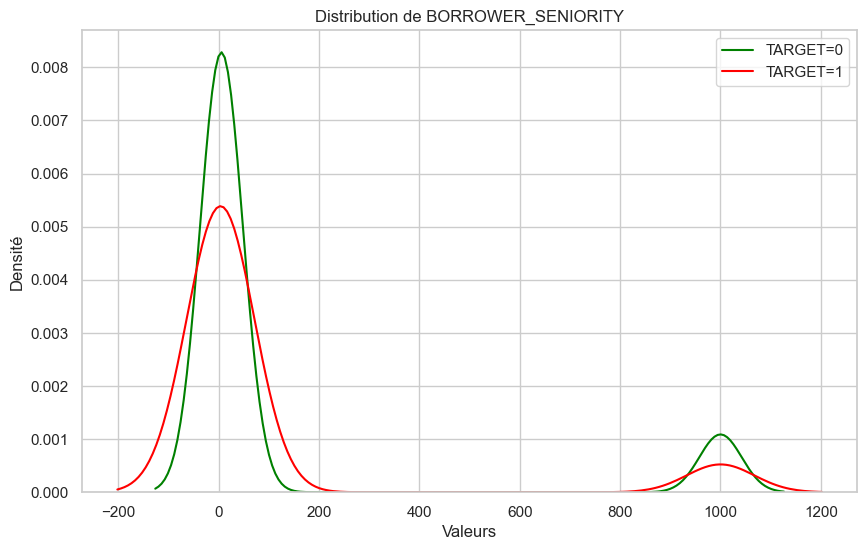

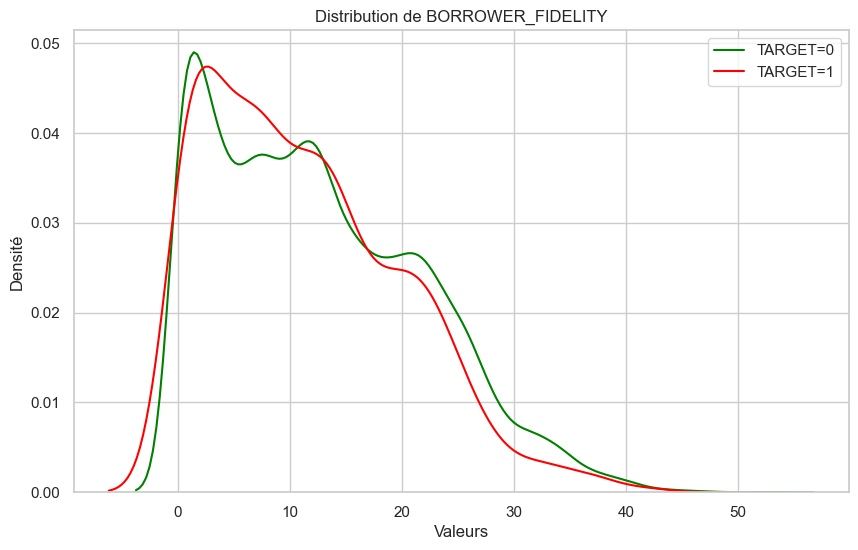

In [95]:
for col in ["BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

In [96]:
data["BORROWER_SENIORITY"].quantile(q=0.8)

13.0

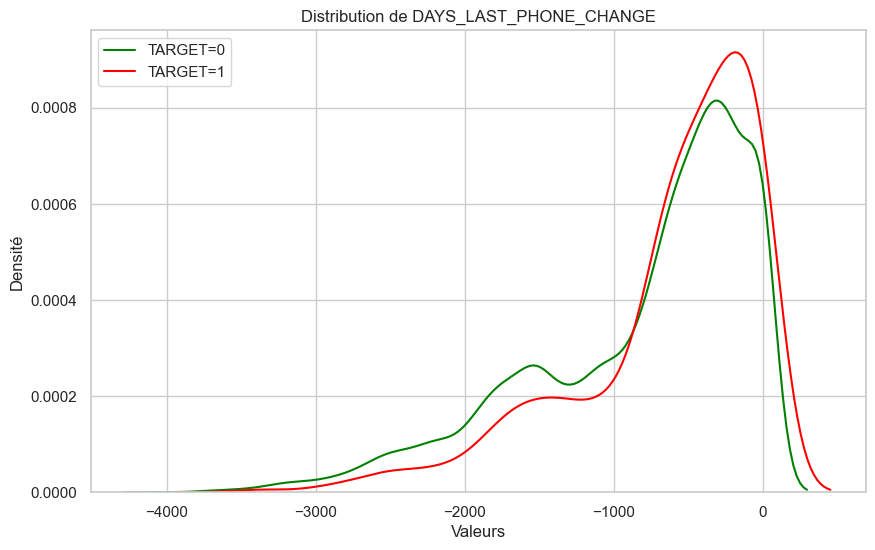

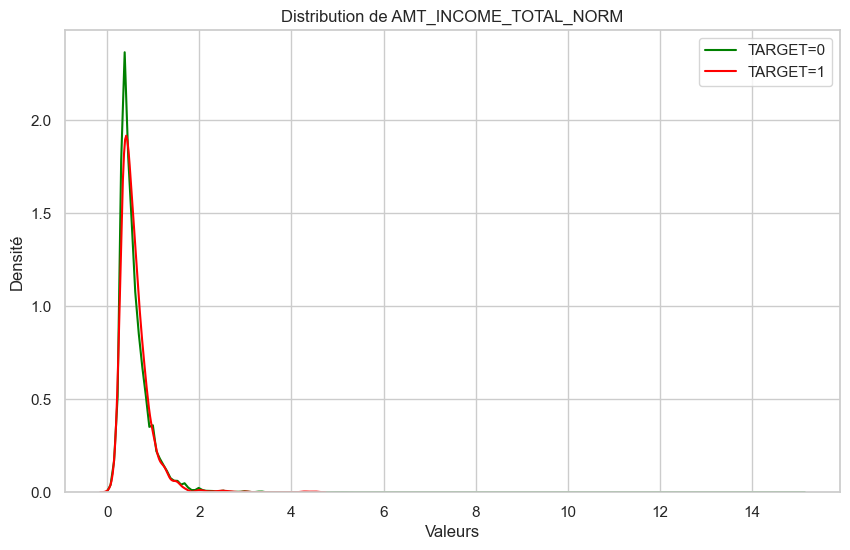

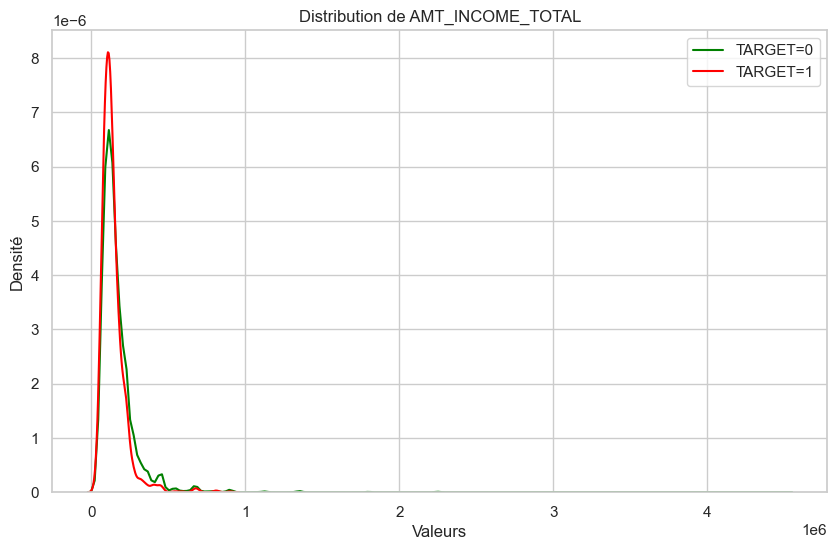

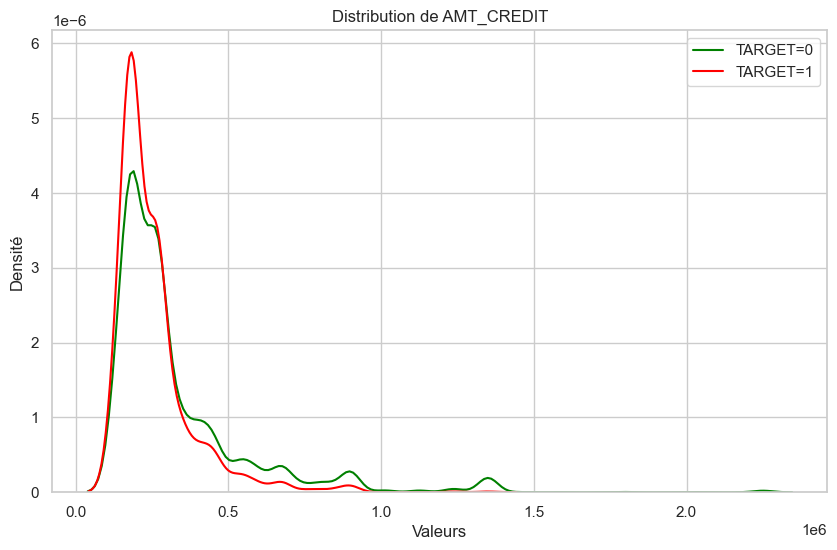

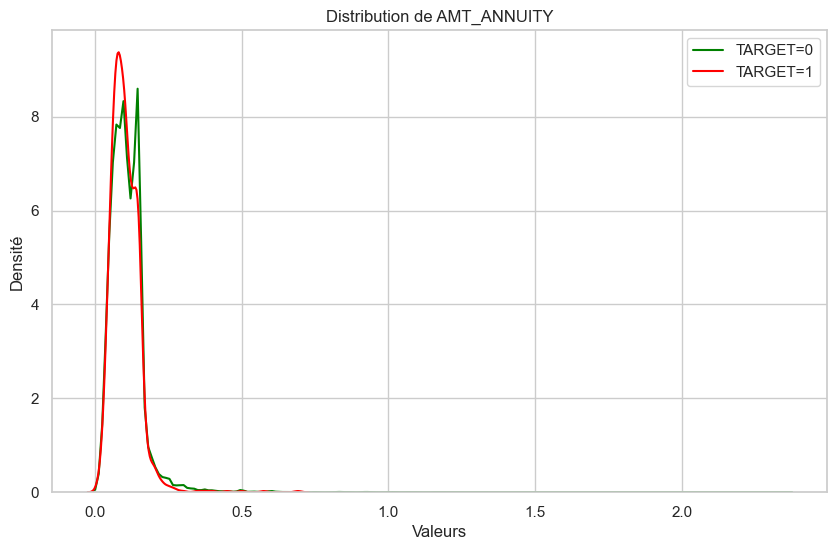

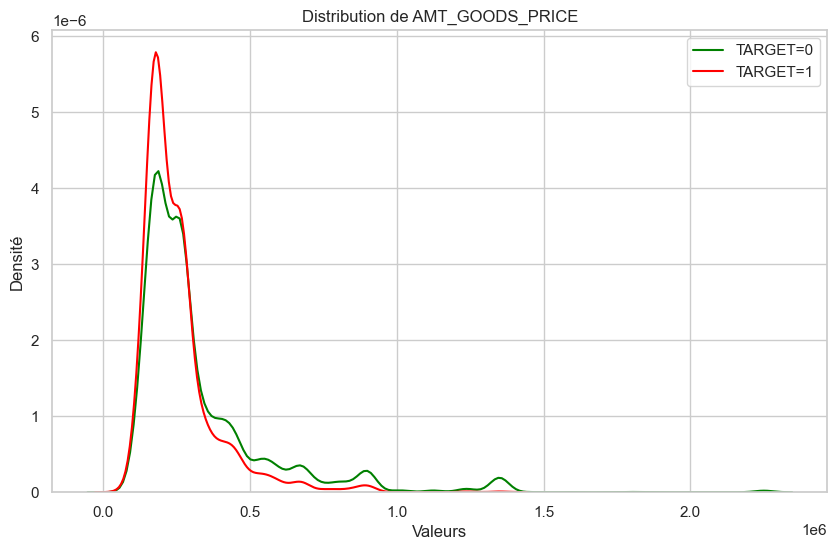

In [97]:
for col in ["DAYS_LAST_PHONE_CHANGE","AMT_INCOME_TOTAL_NORM", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

#### Test de rang des variables numériques ? 

In [98]:
numerical_vars=[var for var in numerical_vars if (var not in binary_vars)& (var not in low_category_categorical_vars)]

In [99]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YE

In [100]:
data["CNT_FAM_MEMBERS"].value_counts(normalize=True)

CNT_FAM_MEMBERS
2.0     0.454995
1.0     0.239240
3.0     0.202718
4.0     0.088910
5.0     0.012331
6.0     0.001532
7.0     0.000196
14.0    0.000039
8.0     0.000039
Name: proportion, dtype: float64

In [101]:
data[['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count                21757.000000               21757.000000                21757.000000                21757.00000               21757.000000                21757.000000
mean                     0.006710                   0.004964                    0.024544                    0.22880                   0.211886                    1.599026
std                      0.084955                   0.076543                    0.160565                    0.87841                   0.559939                    1.797502
min                      0.000000                   0.000000                    0.000000                    0.00000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                    0.00000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                    0.00000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                    0.00000                   0.000000                    2.000000
max                      2.000000                   2.000000                    3.000000                   17.00000                   8.000000                   16.000000

In [102]:
tested_numerical_variables=[
    "BORROWER_AGE","BORROWER_SENIORITY", "BORROWER_FIDELITY",
    "AMT_CREDIT_NORM", 
     'CB_NB_CREDIT_CLOSED', 'CB_DAYS_CREDIT',
    "AMT_INCOME_TOTAL_NORM","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE", 'CB_AMT_CREDIT_SUM_DEBT', 'CB_NB_CREDIT_ACTIVE', 'CB_DAYS_CREDIT_ENDDATE', 'CB_AMT_CREDIT_SUM', 'CB_AMT_ANNUITY'
] 

# "AMT_INCOME_TOTAL_NORM","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE", 'CB_AMT_CREDIT_SUM_DEBT', 'CB_NB_CREDIT_ACTIVE', 'CB_DAYS_CREDIT_ENDDATE', 'CB_AMT_CREDIT_SUM', 'CB_AMT_ANNUITY'

In [103]:
for col in tested_numerical_variables:
    mannwhitney_test(data,col,"TARGET")

Variable: BORROWER_AGE
Mann-Whitney U-statistic: 18761211.0
P-value: 1.3674681638120545e-29
Variable: BORROWER_SENIORITY
Mann-Whitney U-statistic: 18864595.0
P-value: 7.76830732456366e-32
Variable: BORROWER_FIDELITY
Mann-Whitney U-statistic: 17033347.0
P-value: 3.637096164057627e-06
Variable: AMT_CREDIT_NORM
Mann-Whitney U-statistic: 15808299.0
P-value: 0.6786131605348409
Variable: CB_NB_CREDIT_CLOSED
Mann-Whitney U-statistic: 17665318.0
P-value: 6.050909145792827e-13
Variable: CB_DAYS_CREDIT
Mann-Whitney U-statistic: 13984236.0
P-value: 4.706376930670397e-13
Variable: AMT_INCOME_TOTAL_NORM
Mann-Whitney U-statistic: 14861979.0
P-value: 0.00017548668590763636
Variable: AMT_INCOME_TOTAL
Mann-Whitney U-statistic: 18266481.5
P-value: 4.796667935572664e-21
Variable: AMT_CREDIT
Mann-Whitney U-statistic: 18734143.0
P-value: 1.427403564137077e-29
Variable: AMT_ANNUITY
Mann-Whitney U-statistic: 16831010.0
P-value: 0.00011748317654039118
Variable: AMT_GOODS_PRICE
Mann-Whitney U-statistic: 187677

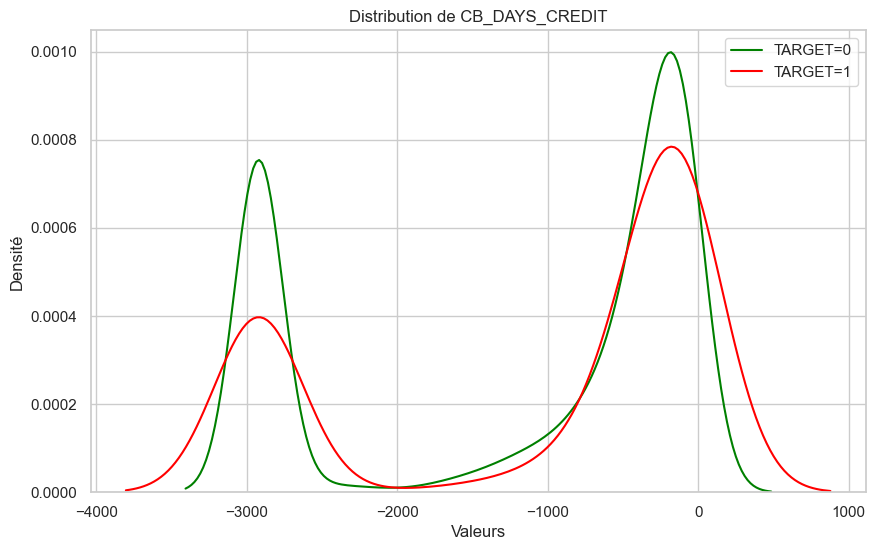

In [104]:
col="CB_DAYS_CREDIT"
plt.figure(figsize=(10, 6))
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

plt.title(f"Distribution de {col}")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()

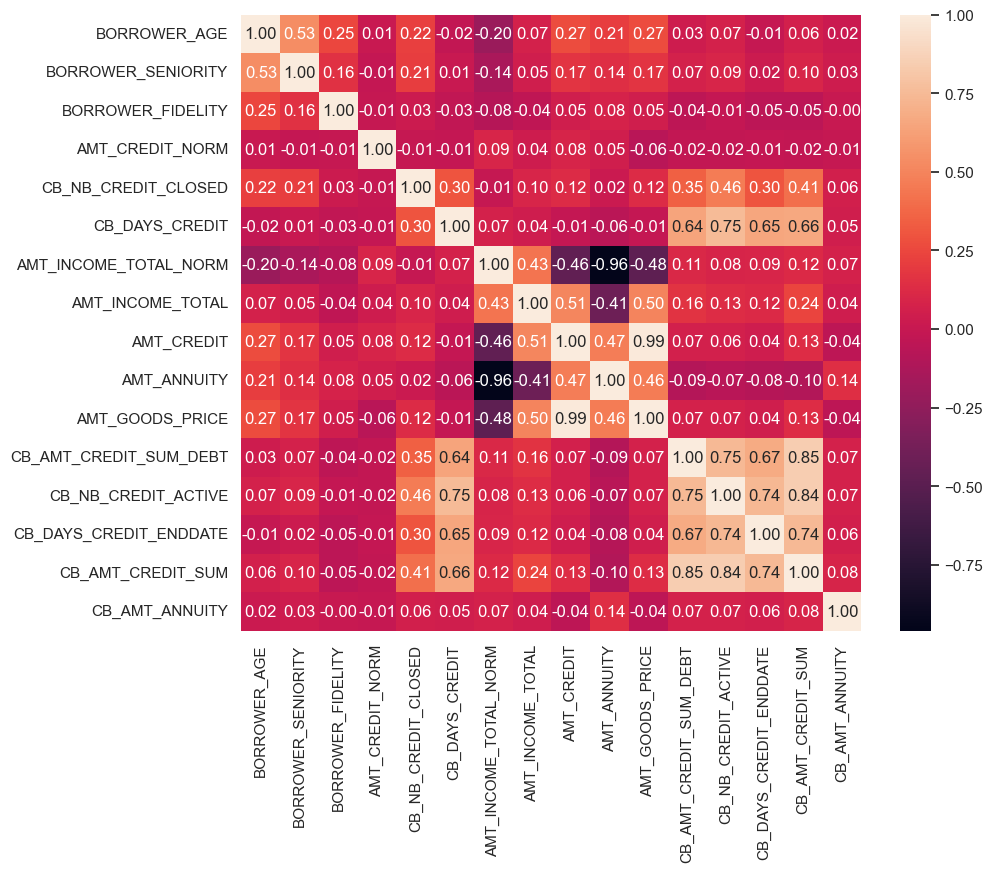

In [105]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data[tested_numerical_variables].corr(method="spearman"), annot=True,fmt=".2f")
plt.show()

In [106]:
tested_variables=tested_numerical_variables+binary_vars+low_category_categorical_vars+["NAME_EDUCATION_TYPE"]

In [107]:
#ohe=OneHotEncoder(sparse_output=False, drop="first").set_output(transform="pandas")

In [108]:
# ohe.fit(data[binary_vars+low_category_categorical_vars+["NAME_EDUCATION_TYPE"]])
# data[ohe.get_feature_names_out(ohe.feature_names_in_)]=ohe.transform(data[binary_vars+low_category_categorical_vars+["NAME_EDUCATION_TYPE"]])

In [109]:
categorical_vars

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'WALLSMATERIAL_MODE']

In [110]:
low_category_categorical_vars

['FLAG_OWN_CAR',
 'HAS_CHILDREN',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [111]:
le=LabelEncoder()
for column in binary_vars+["HAS_CHILDREN"]+["NAME_EDUCATION_TYPE"] + ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']:
    data[column]=le.fit_transform(data[column])

In [112]:
candidate_predictors=tested_numerical_variables + ["HAS_CHILDREN"]+ ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']#+list(ohe.get_feature_names_out(ohe.feature_names_in_))

In [113]:
candidate_predictors

['BORROWER_AGE',
 'BORROWER_SENIORITY',
 'BORROWER_FIDELITY',
 'AMT_CREDIT_NORM',
 'CB_NB_CREDIT_CLOSED',
 'CB_DAYS_CREDIT',
 'AMT_INCOME_TOTAL_NORM',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CB_AMT_CREDIT_SUM_DEBT',
 'CB_NB_CREDIT_ACTIVE',
 'CB_DAYS_CREDIT_ENDDATE',
 'CB_AMT_CREDIT_SUM',
 'CB_AMT_ANNUITY',
 'HAS_CHILDREN',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [114]:
# tested_numerical_variables.remove("AMT_ANNUITY")

In [115]:
from xgboost import XGBClassifier
# from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
X = data[tested_numerical_variables]
y = data['TARGET']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, )
rf_model = XGBClassifier(n_estimators=3000, max_samples=0.9, random_state=42)

# Appliquer la sélection de variables sur les données d'entraînement
sfm_rf = SelectFromModel(rf_model, threshold="median")  # 
X_train_selected = sfm_rf.fit_transform(X_train, y_train)
selected_features = list(X_train.columns[sfm_rf.get_support()])
print("Variables sélectionnées par Random Forest:")
print(selected_features)
# Adapter le modèle sur les données d'entraînement sélectionnées
rf_model_selected = XGBClassifier(n_estimators=3000 , max_samples=0.9, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)
print(rf_model_selected.feature_importances_)
# Appliquer la sélection de variables sur les données de test
X_test_selected = sfm_rf.transform(X_test)

# Faire des prédictions sur les données de test
y_pred_proba = rf_model_selected.predict_proba(X_test_selected)[:, 1]

# Calculer l'AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Afficher l'AUC
print(f'Aire sous la Courbe ROC (AUC) : {auc}')

Variables sélectionnées par Random Forest:
['AMT_CREDIT_NORM', 'CB_DAYS_CREDIT', 'AMT_CREDIT', 'CB_AMT_CREDIT_SUM_DEBT', 'CB_NB_CREDIT_ACTIVE', 'CB_DAYS_CREDIT_ENDDATE', 'CB_AMT_CREDIT_SUM', 'CB_AMT_ANNUITY']
[0.04443532 0.12488235 0.1214449  0.1306063  0.17083745 0.12304128
 0.1259388  0.15881364]
Aire sous la Courbe ROC (AUC) : 0.5705740833005919


In [116]:
selected_features

['AMT_CREDIT_NORM',
 'CB_DAYS_CREDIT',
 'AMT_CREDIT',
 'CB_AMT_CREDIT_SUM_DEBT',
 'CB_NB_CREDIT_ACTIVE',
 'CB_DAYS_CREDIT_ENDDATE',
 'CB_AMT_CREDIT_SUM',
 'CB_AMT_ANNUITY']

In [117]:
# selected_features=["AMT_GOODS_PRICE", "OCCUPATION_TYPE", "NAME_EDUCATION_TYPE" , "DAYS_LAST_PHONE_CHANGE" , "BORROWER_SENIORITY" , "CB_NB_CREDIT_CLOSED", "CB_DAYS_CREDIT"]

In [118]:
ohe=OneHotEncoder(sparse_output=False, drop="first").set_output(transform="pandas")
ohe.fit(data[["OCCUPATION_TYPE","NAME_EDUCATION_TYPE"]])
data[ohe.get_feature_names_out(ohe.feature_names_in_)]=ohe.transform(data[["OCCUPATION_TYPE","NAME_EDUCATION_TYPE"]])

In [119]:
selected_features = list(ohe.get_feature_names_out(ohe.feature_names_in_)) + ['BORROWER_AGE', 'BORROWER_SENIORITY', 'AMT_CREDIT_NORM', 'CB_NB_CREDIT_CLOSED', 'CB_DAYS_CREDIT']

In [120]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

data_train, data_test = train_test_split(data, test_size=0.3, stratify=data["TARGET"], random_state=42)

In [137]:
X_train, X_test = data_train[selected_features], data_test[selected_features]
y_train, y_test = data_train["TARGET"], data_test["TARGET"]

In [138]:

# # Définition de la fonction objectif pour Optuna
# def objective(trial):
#     # Paramètres à optimiser avec des plages étendues
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
#         'max_depth': trial.suggest_int('max_depth', 3, 20),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001, 0.5),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 10),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'min_child_weight': trial.suggest_float('min_child_weight', 0.5, 20),
#         'random_state':trial.suggest_int('random_state',0,9999)
#     }

#     # Création du modèle XGBoost avec les hyperparamètres suggérés par Optuna
#     model = XGBClassifier(objective='binary:logistic', **params)

#     # Séparation des données en ensembles d'entraînement et de test

#     # Entraînement du modèle
#     model.fit(X_train, y_train)

#     # Prédiction des probabilités sur l'ensemble de test
#     y_pred_proba = model.predict_proba(X_test)[:, 1]

#     # Calcul de la ROC AUC
#     roc_auc = roc_auc_score(y_test, y_pred_proba)

#     return roc_auc

# # Optimisation des hyperparamètres avec Optuna
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)

# # Affichage des meilleurs hyperparamètres et de la valeur de l'objectif
# print('Best trial:')
# best_trial = study.best_trial
# print('  Value: {:.3f}'.format(best_trial.value))
# print('  Params: ')
# for key, value in best_trial.params.items():
#     print('    {}: {}'.format(key, value))


In [139]:
# best_trial.params

In [140]:
params_xgb = {'n_estimators': 4988,
 'max_depth': 11,
 'learning_rate': 0.0006423460068211628,
 'subsample': 0.8082345989058433,
 'colsample_bytree': 0.8779784075497485,
 'gamma': 0.722013992070138,
 'reg_alpha': 6.149182338285543,
 'reg_lambda': 0.8197501262189548,
 'min_child_weight': 6.579637878659259,
 'random_state': 1760}

In [141]:
# import optuna
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score

# # Chargement des données
# # X, y = data[selected_features], data["TARGET"]

# # Définition de la fonction objectif pour Optuna
# def objective(trial):
#     # Paramètres à optimiser
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001, 0.5),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'min_child_weight': trial.suggest_float('min_child_weight', 0.5, 10)
#     }

#     # Création du modèle LightGBM avec les hyperparamètres suggérés par Optuna
#     model = lgb.LGBMClassifier(
#         objective='binary',
#         random_state= 42,
#         **params
#     )

#     # Séparation des données en ensembles d'entraînement et de test
#     # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#     # Entraînement du modèle
#     model.fit(X_train, y_train)

#     # Prédiction des probabilités sur l'ensemble de test
#     y_pred_proba = model.predict_proba(X_test)[:, 1]

#     # Calcul de la ROC AUC
#     roc_auc = roc_auc_score(y_test, y_pred_proba)

#     return roc_auc

# # Optimisation des hyperparamètres avec Optuna
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Affichage des meilleurs hyperparamètres et de la valeur de l'objectif
# print('Best trial:')
# best_trial = study.best_trial
# print('  Value: {:.3f}'.format(best_trial.value))
# print('  Params: ')
# for key, value in best_trial.params.items():
#     print('    {}: {}'.format(key, value))


In [142]:
2*0.677 - 1

0.3540000000000001

#### Model Interpretability with SHAP

In [143]:
params={"n_estimators": 1919,
    "max_depth": 3,
    "learning_rate": 0.0859629599254648,
    "subsample": 0.5551507002697985,
    "colsample_bytree": 0.5259021305964645,
    "gamma": 4.73594274760292,
    "reg_alpha": 2.0479518991587744,
    "reg_lambda": 1.6104339752926782,
    "min_child_weight": 9.552310062227694}

In [144]:

params2={"n_estimators" : 3465,
    "max_depth" : 3,
    "learning_rate" : 0.005,
    "subsample" : 0.75,
    "colsample_bytree"  : 0.5,
    "gamma" : 3,
    "reg_alpha" : 6,
    "reg_lambda" : 1,
    "min_child_weight" : 2.8
    }   

In [158]:
model = XGBClassifier(
        objective='binary:logistic',
        **params_xgb
    )

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

    # Entraînement du modèle
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8779784075497485, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.722013992070138,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0006423460068211628,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=6.579637878659259, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=4988,
              n_jobs=None, num_parallel_tree=None, random_state=1760, ...)

In [159]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcul de la ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [160]:
roc_auc

0.6782655699243453

In [161]:
2*roc_auc - 1 #0.37443989576981496

0.35653113984869056

In [162]:
selected_features

['OCCUPATION_TYPE_1',
 'OCCUPATION_TYPE_2',
 'OCCUPATION_TYPE_3',
 'NAME_EDUCATION_TYPE_1',
 'BORROWER_AGE',
 'BORROWER_SENIORITY',
 'AMT_CREDIT_NORM',
 'CB_NB_CREDIT_CLOSED',
 'CB_DAYS_CREDIT']

In [163]:
X_train

OCCUPATION_TYPE_1  OCCUPATION_TYPE_2  OCCUPATION_TYPE_3  NAME_EDUCATION_TYPE_1  BORROWER_AGE  BORROWER_SENIORITY  AMT_CREDIT_NORM  CB_NB_CREDIT_CLOSED  CB_DAYS_CREDIT
12655                0.0                0.0                0.0                    0.0            21                   3              1.0                  1.0         -2922.0
20650                1.0                0.0                0.0                    0.0            38                  10              1.0                  0.0          -143.0
9083                 0.0                1.0                0.0                    1.0            21                   2              1.0                  2.0          -182.0
1568                 0.0                1.0                0.0                    0.0            34                  12              1.0                  5.0         -1043.0
6347                 0.0                1.0                0.0                    0.0            38                   3              1.0                  2.0         -2922.0
...                  ...                ...                ...                    ...           ...                 ...              ...                  ...             ...
8255                 0.0                1.0                0.0                    1.0            21                   2              1.0                  2.0         -2922.0
27                   0.0                1.0                0.0                    1.0            41                   1              1.0                  3.0          -139.0
2130                 0.0                1.0                0.0                    1.0            46                   6              1.0                  2.0          -341.0
1073                 0.0                1.0                0.0                    0.0            50                   6              1.0                  7.0         -2922.0
10714                1.0                0.0                0.0                    0.0            59                1000              1.0                  8.0          -129.0

[17826 rows x 9 columns]

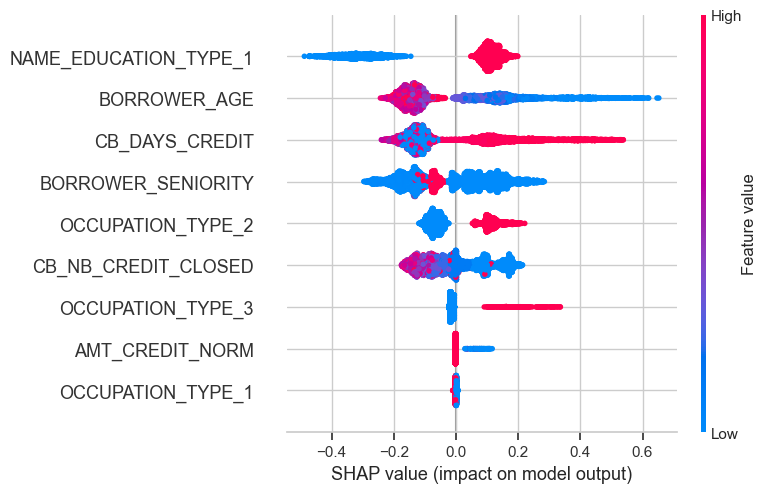

In [164]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Affichage des graphiques des valeurs SHAP
shap.summary_plot(shap_values, X_test, feature_names=selected_features, show=False)
plt.show()

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler= MinMaxScaler()

In [165]:
data_train["Note"] = 10000 * model.predict_proba(X_train)[:,0].reshape(-1,1)
data_test["Note"] = 10000 * model.predict_proba(X_test)[:,0].reshape(-1,1)

In [166]:
data_train["Note"] = data_train["Note"].round(0)
data_test["Note"] = data_test["Note"].round(0)

In [167]:
def show_conditionnal_density(data:pd.DataFrame, colname:str):
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, colname], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, colname], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {colname} sur le test")
    plt.xlabel(f"{colname}")
    plt.ylabel('Pourcentage')
    plt.legend()
    plt.show()

In [168]:
data_train["Note"].min()

8211.0

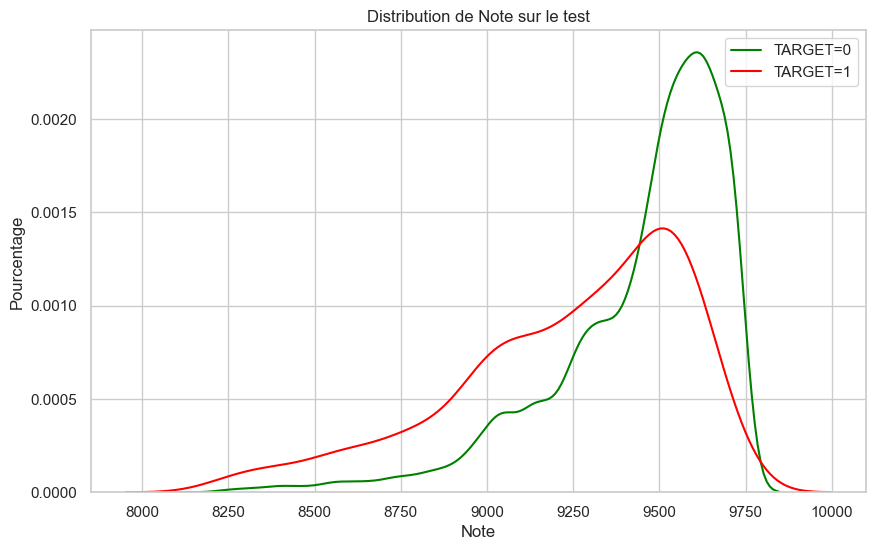

In [169]:
show_conditionnal_density(data_train,"Note")

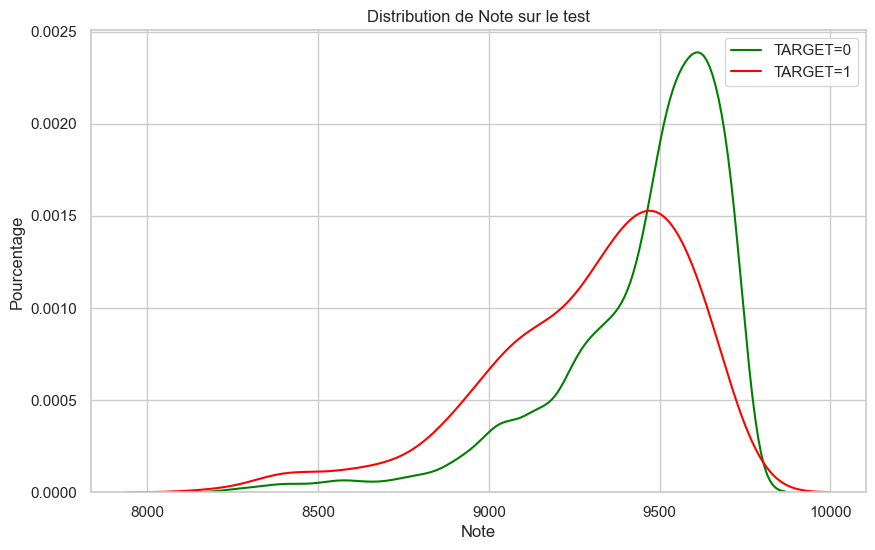

In [170]:
show_conditionnal_density(data_test,"Note")

#### Segmentation -- CHR

In [171]:
from jenkspy import JenksNaturalBreaks

In [172]:
segment=JenksNaturalBreaks(n_classes=7, )
segment.fit(data_train["Note"].values)

In [173]:
segment.breaks_

[8211.0, 8661.0, 8956.0, 9182.0, 9370.0, 9512.0, 9627.0, 9738.0]

In [174]:
segment.goodness_of_variance_fit(data_train["Note"])

0.9679801501204895

In [175]:
data_train["Segment"]=segment.predict(data_train["Note"].values)
data_test["Segment"]=segment.predict(data_test["Note"].values)

In [176]:
data_train["Segment"].value_counts(normalize=True)

Segment
5    0.261304
6    0.243128
4    0.191855
3    0.147425
2    0.100303
1    0.036632
0    0.019354
Name: proportion, dtype: float64

In [177]:
data_train[["Segment","TARGET"]].groupby("Segment").mean()

TARGET
Segment          
0        0.208696
1        0.148545
2        0.096197
3        0.066210
4        0.051754
5        0.035423
6        0.014075

In [178]:
data_test[["Segment","TARGET"]].groupby("Segment").mean()

TARGET
Segment          
0        0.104294
1        0.117216
2        0.101839
3        0.075201
4        0.061392
5        0.031004
6        0.018597

In [179]:
def subplot_segment_default_rate(data):
    mean_target_by_segment = data.groupby('Segment')['TARGET'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data['Segment'].value_counts(normalize=True), color='lightblue', label='Distribution des Segments')
    ax2 = ax.twinx()
    sns.lineplot(x='Segment', y='TARGET', data=mean_target_by_segment, marker='o', color='red', linewidth=2, label='Taux de défaut')
    ax.set_ylabel('Taux d\'observations par segment', color='blue')
    ax2.set_ylabel('Taux de défaut', color='blue')
    plt.title('Répartition des CHR et des taux de défaut par CHR')
    plt.show()
    pass

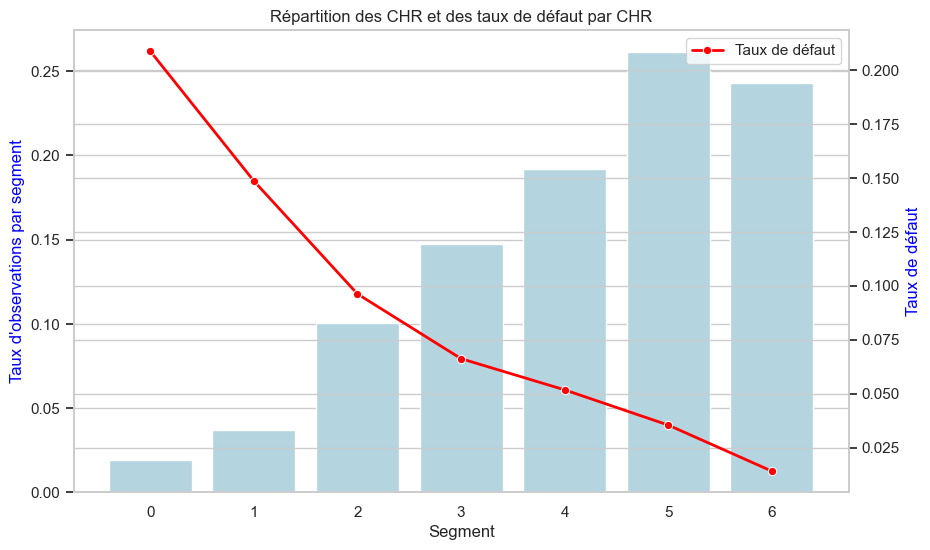

In [180]:
subplot_segment_default_rate(data_train)

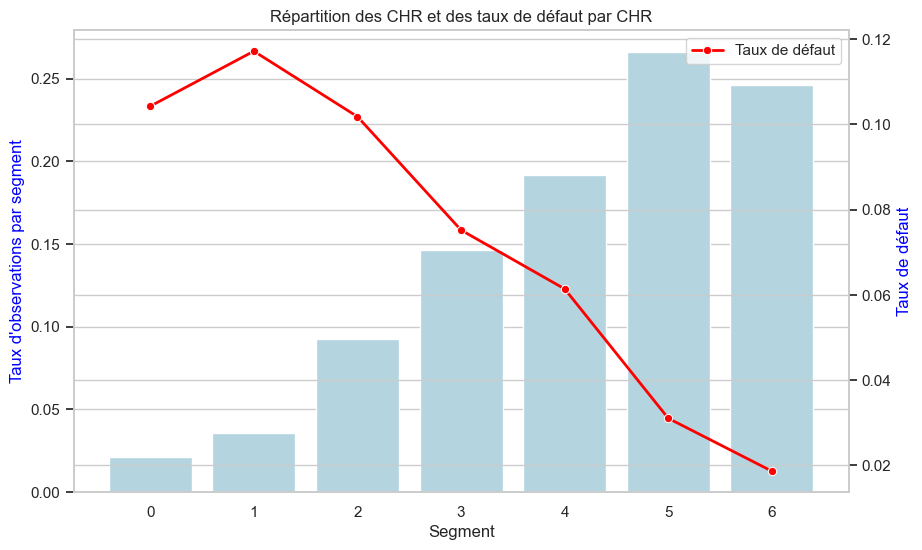

In [181]:
subplot_segment_default_rate(data_test)

In [182]:
data_test[["Segment","TARGET"]].groupby("Segment").mean()

TARGET
Segment          
0        0.104294
1        0.117216
2        0.101839
3        0.075201
4        0.061392
5        0.031004
6        0.018597

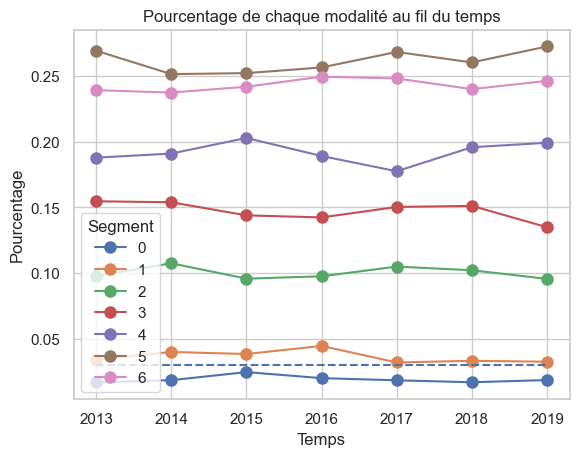

In [183]:
show_volume_stability_overtime(data_train,"Segment",0.03)

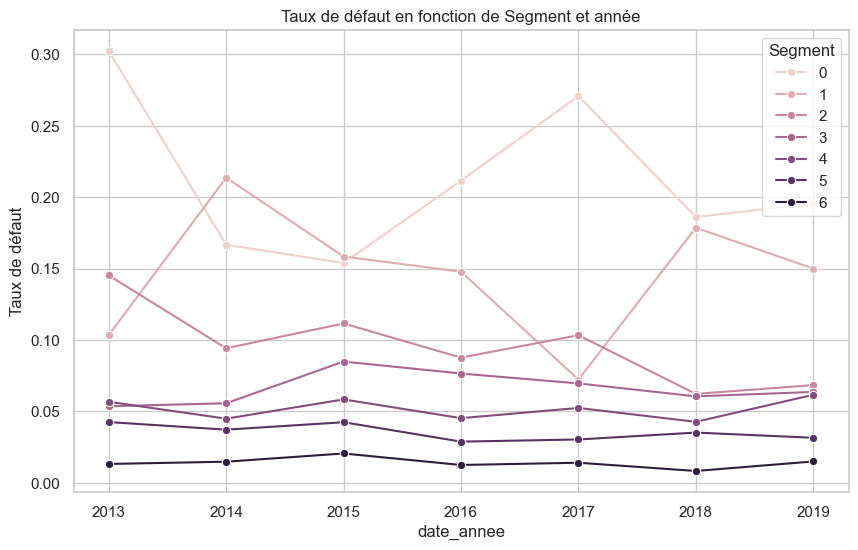

In [184]:
show_risk_stability_overtime(data_train,"Segment")

#### Model calibration (méthodes d'inférence non paramétrique)

##### MoC C

In [186]:
# Nombre d'échantillons bootstrap par segment
num_bootstrap_samples = 5000
moc_c_segment={}

def lra_calculation(sample):
    lra = sample.groupby("date_annee").mean().mean()
    return lra.values

# Boucle pour chaque segment
for segment in range(7):
    # Echantillons bootstrap
    sample_size=data_test[data_test["Segment"]==segment].shape[0]
    bootstrap_samples = [data_test[data_test["Segment"]==segment].sample(frac=1, replace=True)[["TARGET","date_annee"]] for _ in range(num_bootstrap_samples)]
    
    # Default rate
    lra_s = [lra_calculation(sample) for sample in bootstrap_samples]
    
    # Calculer le 90e centile et la moyenne
    percentile_90 = np.percentile(lra_s, 90)
    mean_rate = np.mean(lra_s)
    moc_c=percentile_90 - mean_rate
    moc_c_segment[segment]=moc_c
    
    temp_df = pd.DataFrame({
        'Size':[sample_size],
        'Segment': [segment],
        'Percentile_90': [percentile_90],
        'Mean_Rate': [mean_rate],
        "MoC_C": [moc_c]
    })
    
    print(temp_df)

   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0   163        0       0.137366   0.105333  0.032033
   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0   273        1       0.137085   0.112768  0.024317
   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0   707        2        0.11754   0.102401  0.015139
   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  1117        3       0.085256   0.075015  0.010241
   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  1466        4       0.069215   0.061417  0.007798
   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  2032        5          0.036   0.031015  0.004986
   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  1882        6        0.02304   0.018851  0.004189


In [187]:
moc_c_segment

{0: 0.032033333755405805,
 1: 0.024317414692302378,
 2: 0.015139038754777123,
 3: 0.010241322147335238,
 4: 0.007797710459101596,
 5: 0.004985840358763059,
 6: 0.00418890393603551}

##### MoC A

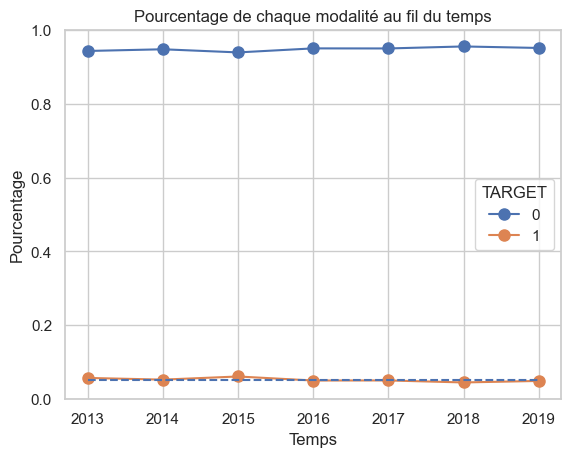

In [188]:
show_volume_stability_overtime(data_train,"TARGET")

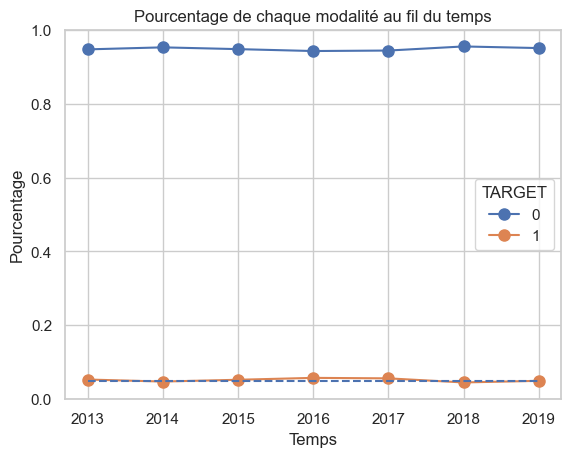

In [189]:
show_volume_stability_overtime(data_test,"TARGET")

In [190]:
# Quantification :
deficiency_impact=((data.loc[data["date_annee"]<2019,"TARGET"].mean())/(data["TARGET"].mean()) - 1 )*100

In [191]:
deficiency_impact

0.9026449563225514

In [192]:
# Nombre d'échantillons bootstrap par segment
num_bootstrap_samples = 5000
moc_a_segment={}
# Fonction pour calculer le taux de 1 dans un échantillon bootstrap

def calculate_adjustment(sample:pd.DataFrame):
    ajustement=sample.loc[sample["date_annee"]<2019,["TARGET","date_annee"]].groupby("date_annee").mean().mean() - sample[["TARGET","date_annee"]].groupby("date_annee").mean().mean()
    return ajustement.values

# Boucle pour chaque segment
for segment in range(7):
    # Générer des échantillons bootstrap
    sample_size=data_test[data_test["Segment"]==segment].shape[0]
    bootstrap_samples = [data_test[data_test["Segment"]==segment].sample(frac=1, replace=True)[["TARGET","date_annee"]] for _ in range(num_bootstrap_samples)]
    
    # Calcul de l'ajustement sur chaque echantillon
    adjustments = [calculate_adjustment(sample) for sample in bootstrap_samples]
    
    # Calculer le 90e centile et la moyenne
    percentile_90 = np.percentile(adjustments, 90)
    mean_rate = np.mean(adjustments)
    moc_a= percentile_90 - mean_rate
    moc_a_segment[segment] = moc_a
    # Créer un DataFrame temporaire pour le segment actuel
    temp_df_a = pd.DataFrame({
        'Size':[sample_size],
        'Segment': [segment],
        'Percentile_90': [percentile_90],
        'Mean_Rate': [mean_rate],
        "MoC_A": [moc_a]
    })
    
    print(temp_df_a)

   Size  Segment  Percentile_90  Mean_Rate     MoC_A
0   163        0       0.015852   0.006124  0.009728
   Size  Segment  Percentile_90  Mean_Rate     MoC_A
0   273        1       0.001402  -0.010157  0.011559
   Size  Segment  Percentile_90  Mean_Rate     MoC_A
0   707        2       0.007634   0.001948  0.005687
   Size  Segment  Percentile_90  Mean_Rate    MoC_A
0  1117        3       0.003961  -0.000179  0.00414
   Size  Segment  Percentile_90  Mean_Rate     MoC_A
0  1466        4       0.003891   0.000773  0.003118
   Size  Segment  Percentile_90  Mean_Rate     MoC_A
0  2032        5       0.002681   0.000857  0.001824
   Size  Segment  Percentile_90  Mean_Rate     MoC_A
0  1882        6       0.002014   0.000427  0.001587


In [193]:
moc_a_segment

{0: 0.009727807618326721,
 1: 0.011559063797250874,
 2: 0.005686612659092381,
 3: 0.004140150194748633,
 4: 0.003117861705914111,
 5: 0.0018242644817516628,
 6: 0.0015867023721267302}

In [194]:
lra_=data_train[["date_annee","Segment","TARGET"]].groupby(["Segment","date_annee"]).mean().reset_index()

In [195]:
lra=lra_[["Segment","TARGET"]].groupby("Segment").mean()

In [196]:
summary=pd.concat([lra, pd.DataFrame(list(moc_a_segment.values()), columns=["MOC_A"]), pd.DataFrame(list(moc_c_segment.values()), columns=["MOC_C"])], axis=1)

In [197]:
summary["PD"]=summary.sum(axis=1)

In [198]:
summary.rename(columns={"TARGET":"LRA"}, inplace=True)

In [199]:
summary

LRA     MOC_A     MOC_C        PD
0  0.212416  0.009728  0.032033  0.254177
1  0.146306  0.011559  0.024317  0.182183
2  0.096074  0.005687  0.015139  0.116900
3  0.066343  0.004140  0.010241  0.080725
4  0.051708  0.003118  0.007798  0.062623
5  0.035433  0.001824  0.004986  0.042243
6  0.014043  0.001587  0.004189  0.019819